In [1]:
%load_ext autoreload

In [2]:
# ML utils
from ML.machine_learning_models import *
from ML.ml_utils_reg import create_directory, potency_classes, metrics_potency_classes, metric_potency_classes_ub
import seaborn as sns
from ML.ml_utils_reg import plot_regression_models_cat, plot_regression_models_cat_mod, plot_heatmap_stat_analysis
%autoreload 2

In [3]:
# parameters
# Models
model_list =  ['1-NN','kNN','SVR','RFR','MR']
# Number of trials (datasplits)
trial_splits = 10
#Molecular Fingerprint
fingerprint = 'ECFP4'
# Approach
approach = 'Unbalanced'
# Plot
sns.set_style("whitegrid", {'axes.grid' : True})
figure_path = create_directory('./figures/')

# **Load data** Fig3/S2/S3

In [4]:
# Results path
main_folder = 'regression_models_50_50'
result_path = f'./{main_folder}/{fingerprint}/{approach}/'
performance_test_df = pd.read_csv(os.path.join(result_path, f'performance_test.csv'), index_col=False)
performance_test_df

,Target ID,Algorithm,Dataset size,Metric,Value,trial,Approach
0,333,1-NN,431,MAE,0.751883,0,Unbalanced
1,333,1-NN,431,MSE,1.152144,0,Unbalanced
2,333,1-NN,431,R2,0.333263,0,Unbalanced
3,333,1-NN,431,RMSE,1.073380,0,Unbalanced
4,333,1-NN,431,r,0.667505,0,Unbalanced
...,...,...,...,...,...,...,...
1915,286,RFR,345,r,0.785050,9,Unbalanced
1916,286,MR,345,MAE,1.007447,9,Unbalanced
1917,286,MR,345,MSE,1.413853,9,Unbalanced
1918,286,MR,345,R2,-0.060721,9,Unbalanced


In [5]:
performance_test_df_mod = performance_test_df[['Target ID','Algorithm','Dataset size', 'Metric', 'Value', 'trial']].rename(columns={'Dataset size': 'Test size'})
performance_test_df_mod['potency_class'] = '5 - 11'
performance_test_df_mod

,Target ID,Algorithm,Test size,Metric,Value,trial,potency_class
0,333,1-NN,431,MAE,0.751883,0,5 - 11
1,333,1-NN,431,MSE,1.152144,0,5 - 11
2,333,1-NN,431,R2,0.333263,0,5 - 11
3,333,1-NN,431,RMSE,1.073380,0,5 - 11
4,333,1-NN,431,r,0.667505,0,5 - 11
...,...,...,...,...,...,...,...
1915,286,RFR,345,r,0.785050,9,5 - 11
1916,286,MR,345,MAE,1.007447,9,5 - 11
1917,286,MR,345,MSE,1.413853,9,5 - 11
1918,286,MR,345,R2,-0.060721,9,5 - 11


# Calculate squared pearsonr

In [6]:
performance_test_df_mod_spearson = performance_test_df_mod.query('Algorithm != "MR" & Metric == "r"')
performance_test_df_mod_spearson = performance_test_df_mod_spearson.pivot_table(index=["Target ID", "Algorithm", "Test size", "potency_class", "trial"], columns='Metric', values='Value').reset_index()
performance_test_df_mod_spearson['r²'] = [x**2 for x in performance_test_df_mod_spearson.r.values.tolist()]
performance_test_df_mod_spearson.drop(columns='r', inplace=True)
performance_test_df_mod_spearson.set_index(["Target ID", "Algorithm", "Test size", "potency_class", "trial"], inplace=True)
performance_test_df_mod_spearson.columns = pd.MultiIndex.from_product([["Value"], ["r²"]],
                                                              names=["Value", "Metric"])
performance_test_df_mod_spearson = performance_test_df_mod_spearson.stack().reset_index().set_index("Target ID")
performance_test_df_mod_spearson.reset_index(inplace=True)

In [7]:
performance_test_df_mod_ = pd.concat([performance_test_df_mod, performance_test_df_mod_spearson])
performance_test_df_mod_

,Target ID,Algorithm,Test size,Metric,Value,trial,potency_class
0,333,1-NN,431,MAE,0.751883,0,5 - 11
1,333,1-NN,431,MSE,1.152144,0,5 - 11
2,333,1-NN,431,R2,0.333263,0,5 - 11
3,333,1-NN,431,RMSE,1.073380,0,5 - 11
4,333,1-NN,431,r,0.667505,0,5 - 11
...,...,...,...,...,...,...,...
315,2409,kNN,614,r²,0.398506,5,5 - 11
316,2409,kNN,614,r²,0.402135,6,5 - 11
317,2409,kNN,614,r²,0.430068,7,5 - 11
318,2409,kNN,614,r²,0.420052,8,5 - 11


# Predictions Fig3/S2/S3

In [8]:
predictions_test_df = pd.read_csv(os.path.join(result_path, f'predictions_test.csv'), index_col=False)
predictions_test_df['potency_class'] = potency_classes(predictions_test_df.Experimental.values, [5,7,9,11])
predictions_test_df['dataset'] = 'Test'
predictions_test_df

,Unnamed: 0,cid,Experimental,Predicted,smiles,Target ID,Algorithm,Residuals,1-NN,1-NN_smiles,trial,Approach,potency_class,dataset
0,0,CHEMBL2336783,8.241845,8.254145,Cc1ccccc1NC(=O)C=Cc1cccc(O)c1,333,1-NN,-0.012299,CHEMBL2336365,O=C(C=Cc1cccc(O)c1)Nc1ccccc1O,0,Unbalanced,7,Test
1,1,CHEMBL103442,8.154902,8.522879,O=C(NO)C(CCN1C(=O)c2ccccc2S1(=O)=O)COc1ccc(-c2...,333,1-NN,-0.367977,CHEMBL101121,O=C(NO)C(CCN1C(=O)c2ccccc2C1=O)COc1ccc(-c2cccc...,0,Unbalanced,7,Test
2,2,CHEMBL3261753,5.987163,5.634512,CSCCC(N)C(=O)NCC(=O)NC1CC(C(=O)NO)N(S(=O)(=O)c...,333,1-NN,0.352651,CHEMBL3261747,CSCCC(N)C(=O)NCC(=O)NC1CC(C(=O)NO)N(S(=O)(=O)c...,0,Unbalanced,5,Test
3,3,CHEMBL2063426,6.826814,6.659556,O=C1NC(=O)C(c2ccc(Oc3ccccc3)cc2)(N2CCN(CCO[N+]...,333,1-NN,0.167258,CHEMBL2063428,O=C1NC(=O)C(c2ccc(Oc3ccccc3)cc2)(N2CCC(CO[N+](...,0,Unbalanced,5,Test
4,4,CHEMBL379287,6.462181,6.467246,CC#CCOc1ccc(S(=O)(=O)CC2(C(=O)NO)CCN(C(=O)N(CC...,333,1-NN,-0.005065,CHEMBL380049,CC#CCOc1ccc(S(=O)(=O)CC2(C(=O)NO)CCN(C(C)=O)CC...,0,Unbalanced,5,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232645,340,CHEMBL1270180,6.886057,7.906038,Cc1ccc(F)cc1Oc1c(C(=O)N2CCNCC2)c2ccc(OCC(=O)O)...,286,MR,-1.019982,NaN,NaN,9,Unbalanced,5,Test
232646,341,CHEMBL238892,5.408935,7.906038,CCc1nc(N)nc(N)c1-c1ccc2c(c1)N(CCCOC)C(=O)CO2,286,MR,-2.497103,NaN,NaN,9,Unbalanced,5,Test
232647,342,CHEMBL537446,9.000000,7.906038,COCCCOc1cc(CC(CC(N)C(O)CC(C)C(=O)NCCCC#N)C(C)C...,286,MR,1.093962,NaN,NaN,9,Unbalanced,9,Test
232648,343,CHEMBL2048561,6.886057,7.906038,COCCCOc1ccccc1N1CCN(CC(N)C(O)CC(C(=O)NCC(C)(C)...,286,MR,-1.019982,NaN,NaN,9,Unbalanced,5,Test


# Calculate metrics for each potency range

In [9]:
results_pc_un = metric_potency_classes_ub(predictions_test_df,
                                          targets=[333, 268, 280, 203, 279, 2409, 260, 286],
                                          potency_classess=[5,7,9],
                                          trials=10,
                                          algorithms=['1-NN','kNN','SVR','RFR','MR'])
results_pc_un

Value,Target ID,Algorithm,Test size,potency_class,trial,Metric,Value
0,333,1-NN,203,5 - 7,0,MAE,0.735432
1,333,1-NN,203,5 - 7,0,MSE,1.203220
2,333,1-NN,203,5 - 7,0,R2,-3.185290
3,333,1-NN,203,5 - 7,0,RMSE,1.096914
4,333,1-NN,203,5 - 7,0,r²,0.077753
...,...,...,...,...,...,...,...
5755,286,RFR,34,9 - 11,9,r²,0.090540
5756,286,MR,34,9 - 11,9,MAE,1.330573
5757,286,MR,34,9 - 11,9,MSE,1.833248
5758,286,MR,34,9 - 11,9,R2,-28.181509


In [10]:
results_pc_tid_final = pd.concat([results_pc_un, performance_test_df_mod_], axis=0, ignore_index=True, sort=False)
results_pc_tid_final

,Target ID,Algorithm,Test size,potency_class,trial,Metric,Value
0,333,1-NN,203,5 - 7,0,MAE,0.735432
1,333,1-NN,203,5 - 7,0,MSE,1.203220
2,333,1-NN,203,5 - 7,0,R2,-3.185290
3,333,1-NN,203,5 - 7,0,RMSE,1.096914
4,333,1-NN,203,5 - 7,0,r²,0.077753
...,...,...,...,...,...,...,...
7995,2409,kNN,614,5 - 11,5,r²,0.398506
7996,2409,kNN,614,5 - 11,6,r²,0.402135
7997,2409,kNN,614,5 - 11,7,r²,0.430068
7998,2409,kNN,614,5 - 11,8,r²,0.420052


# Plot FigS2a,b, c

In [11]:
results_pc_tid = results_pc_tid_final.copy()
results_pc_tid.rename(columns={'potency_class': 'Potency classes'}, inplace=True)

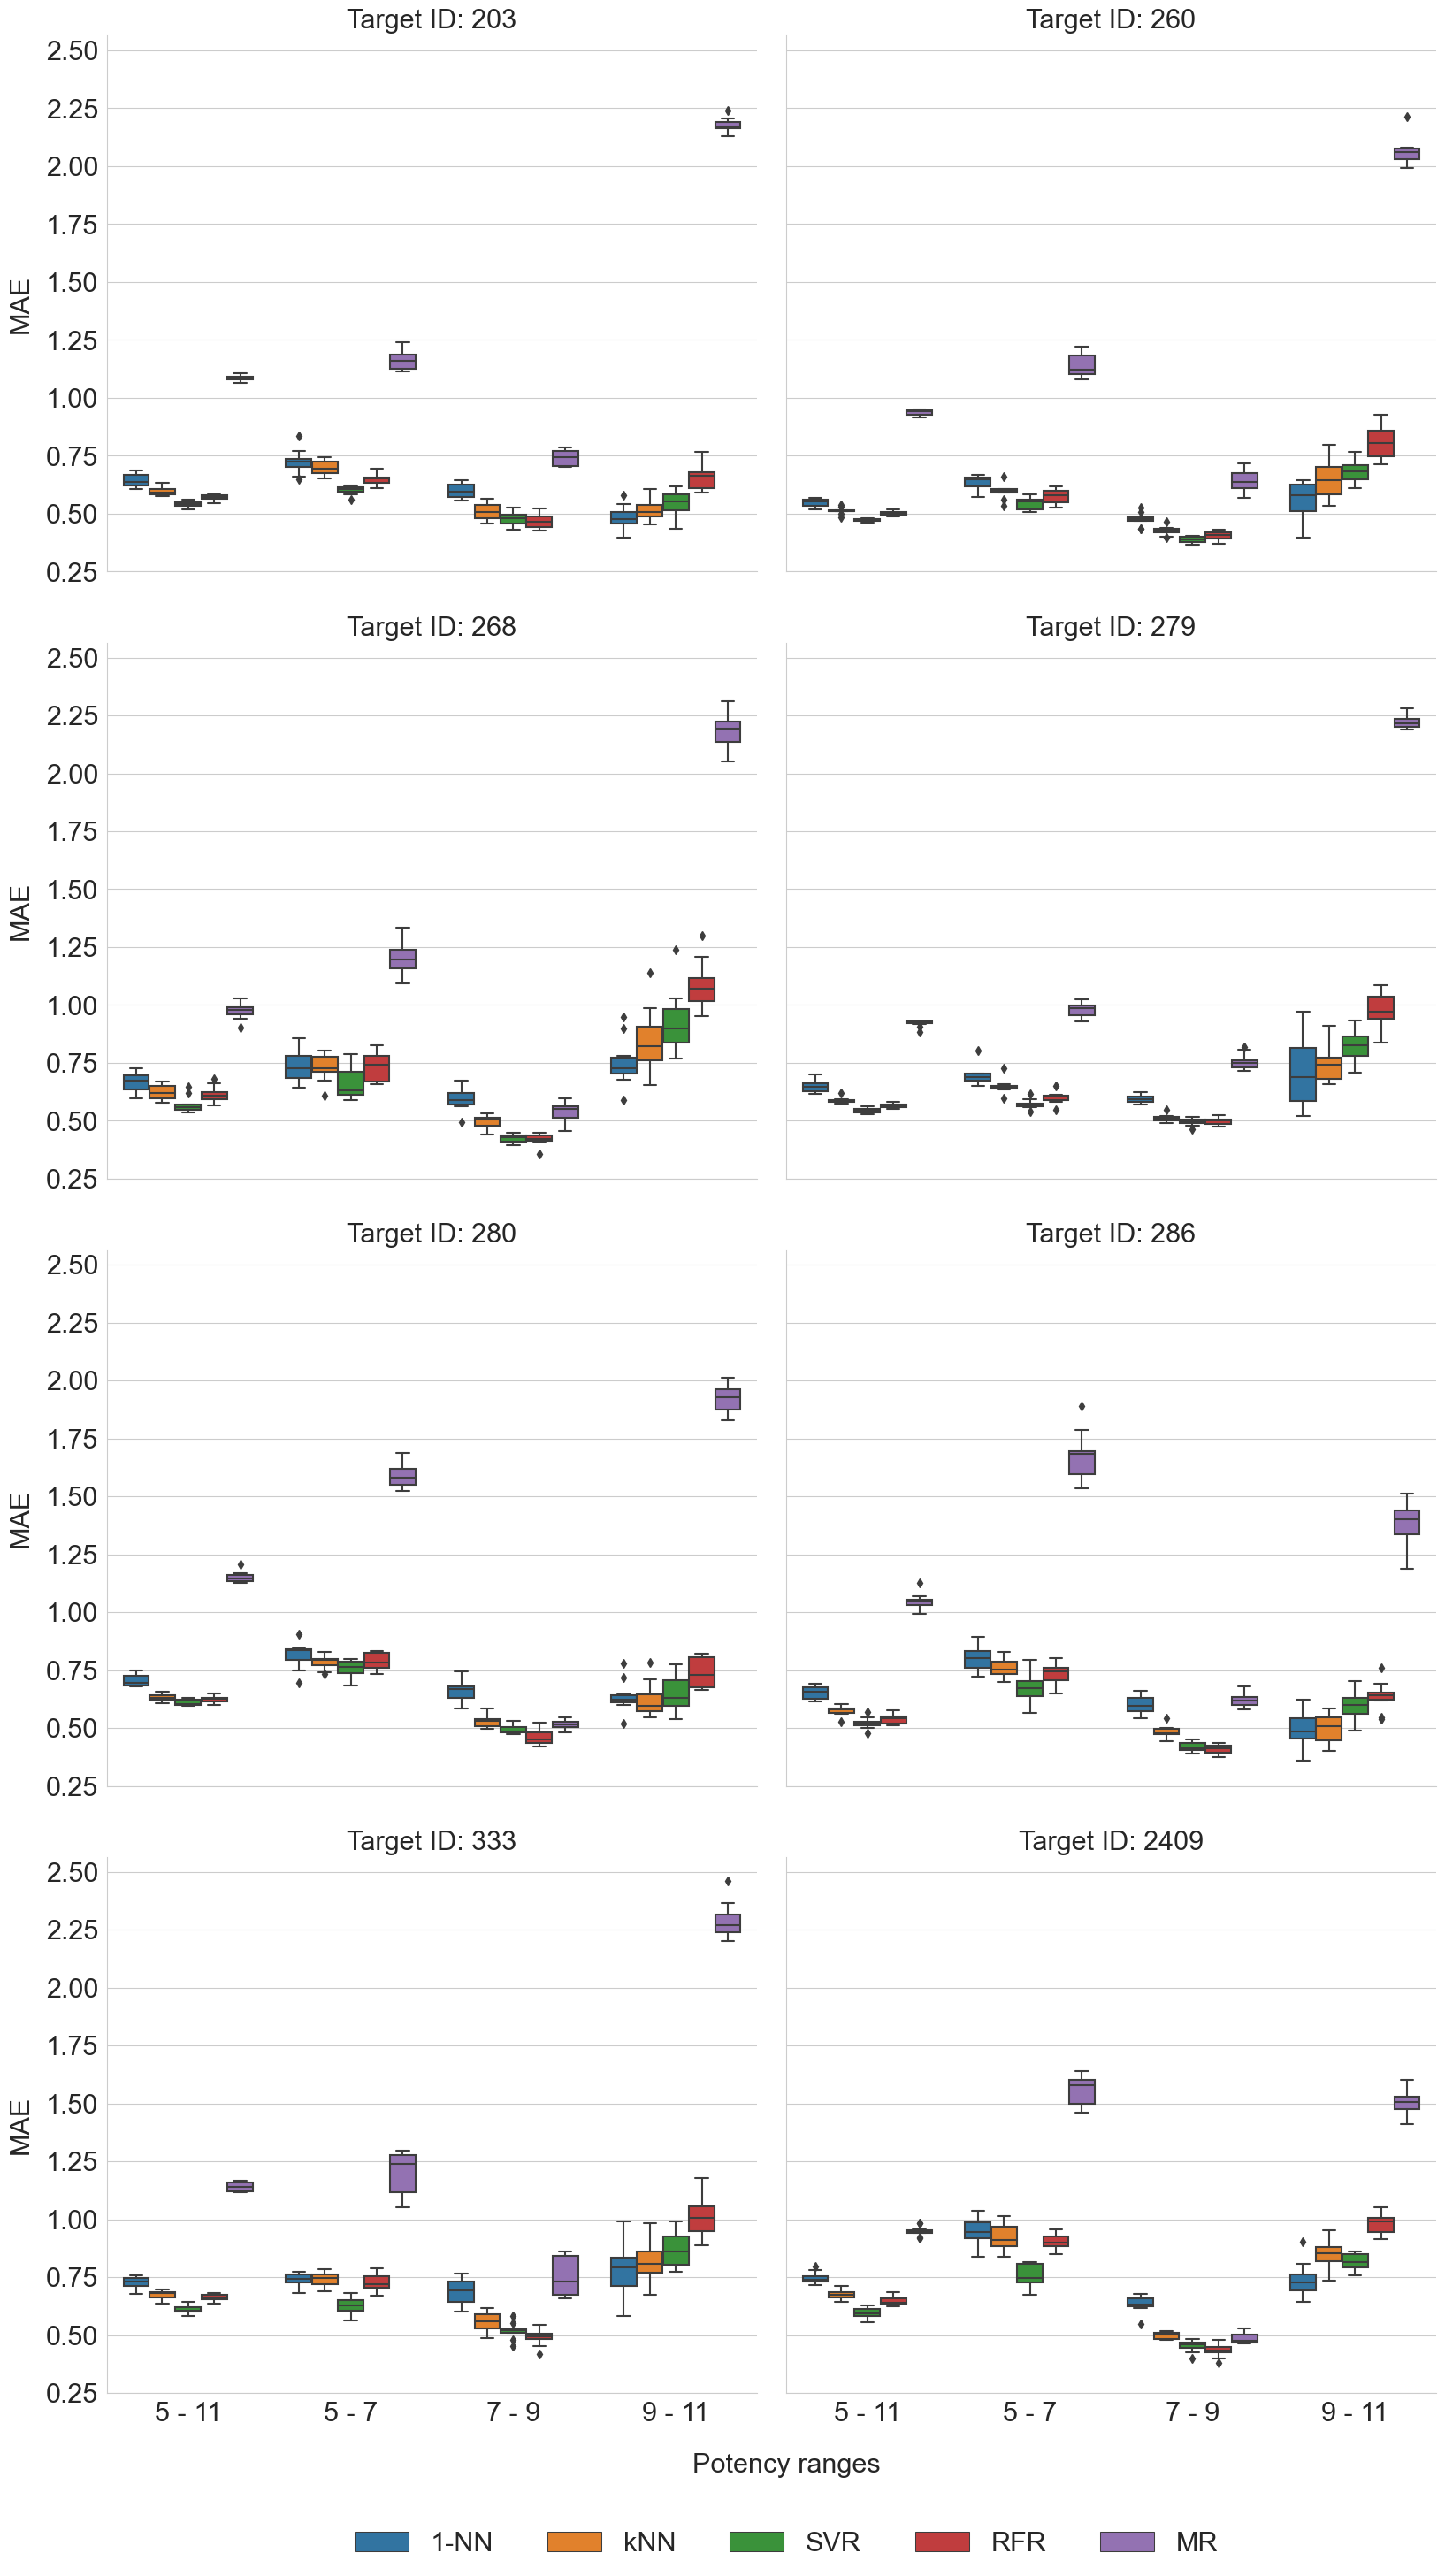

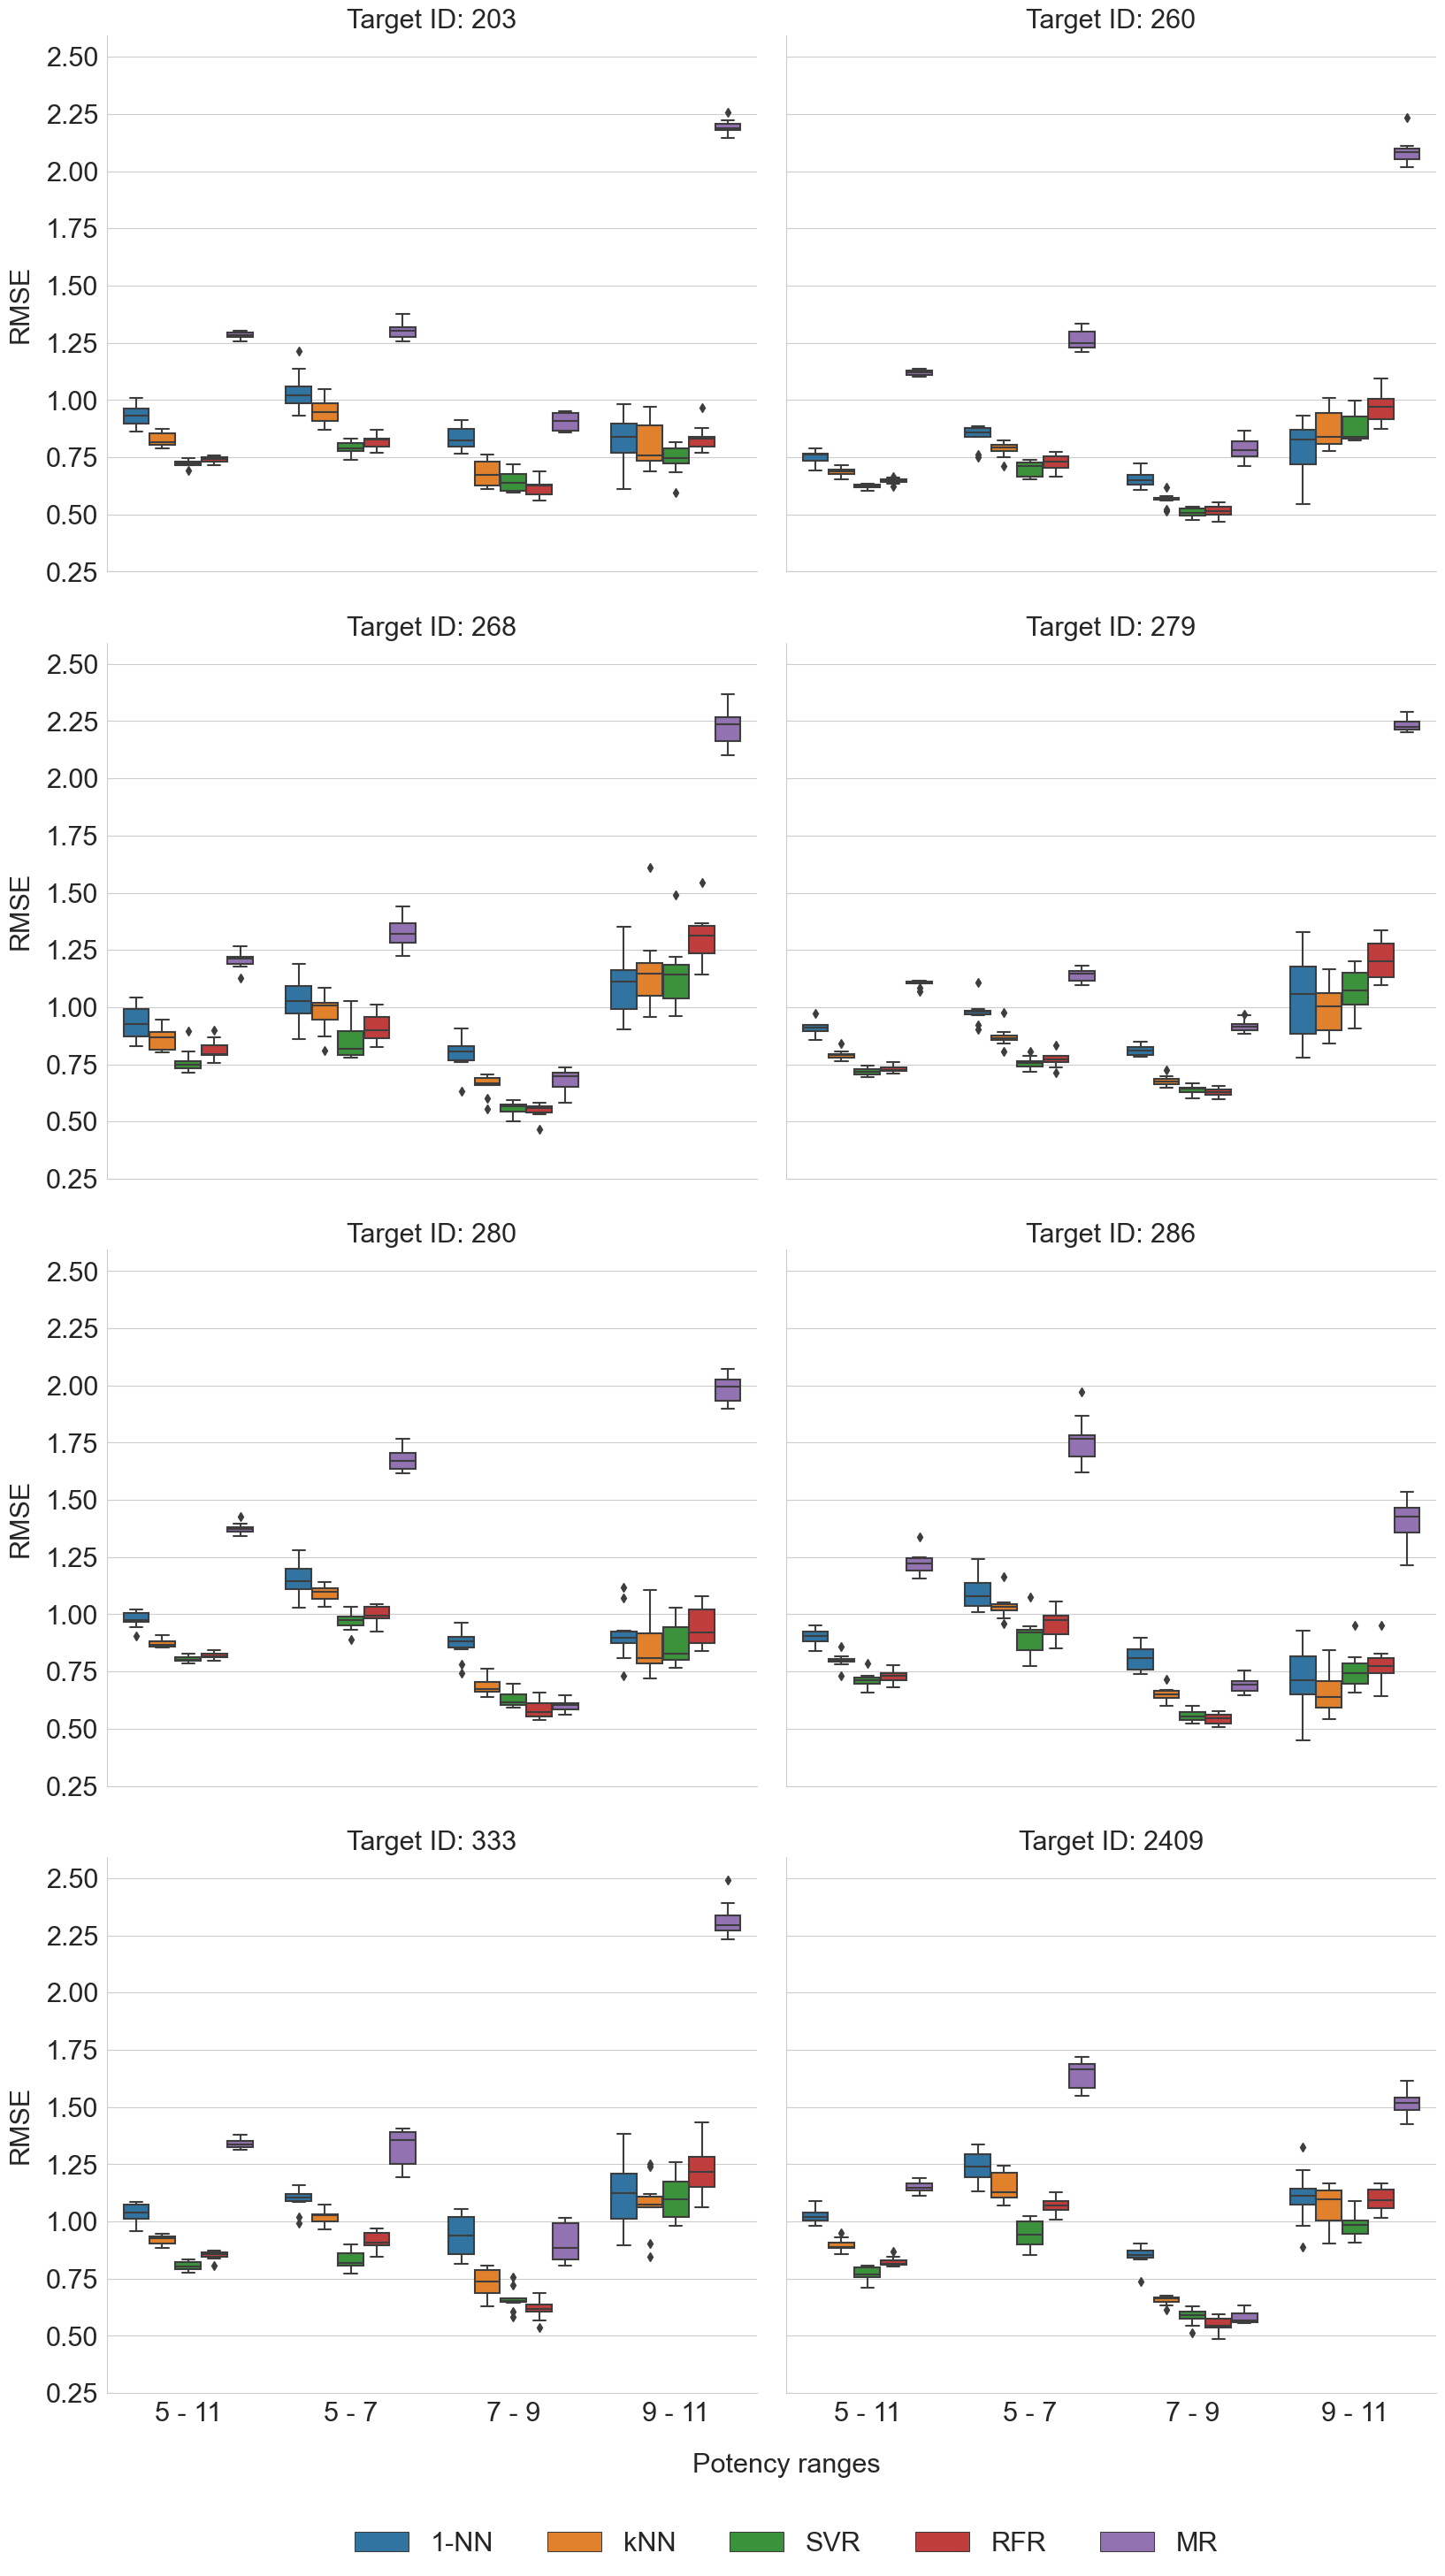

In [15]:
for i, metric_ind in zip(["a", "b",], ["MAE", "RMSE"]):
    plot_regression_models_cat(results_pc_tid, [metric_ind], x='Potency classes', y='Value',
                               col='Target ID',
                               hue = 'Algorithm', hue_order=['1-NN', 'kNN', 'SVR', 'RFR','MR'], order=['5 - 11', '5 - 7', '7 - 9', '9 - 11'], #
                               aspect=1.2, height=7,
                               palette='tab10',
                               y_labels= f'{metric_ind}',
                               font_size=22,
                               row=None, col_wrap=2,
                               sharey='row',
                               yticks=[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5],
                               bbox_to_anchor=(-0.0, -0.35),
                               #results_path=figure_path, filename=f'S{i}', 
                               legend_title='Potency ranges',
                               )

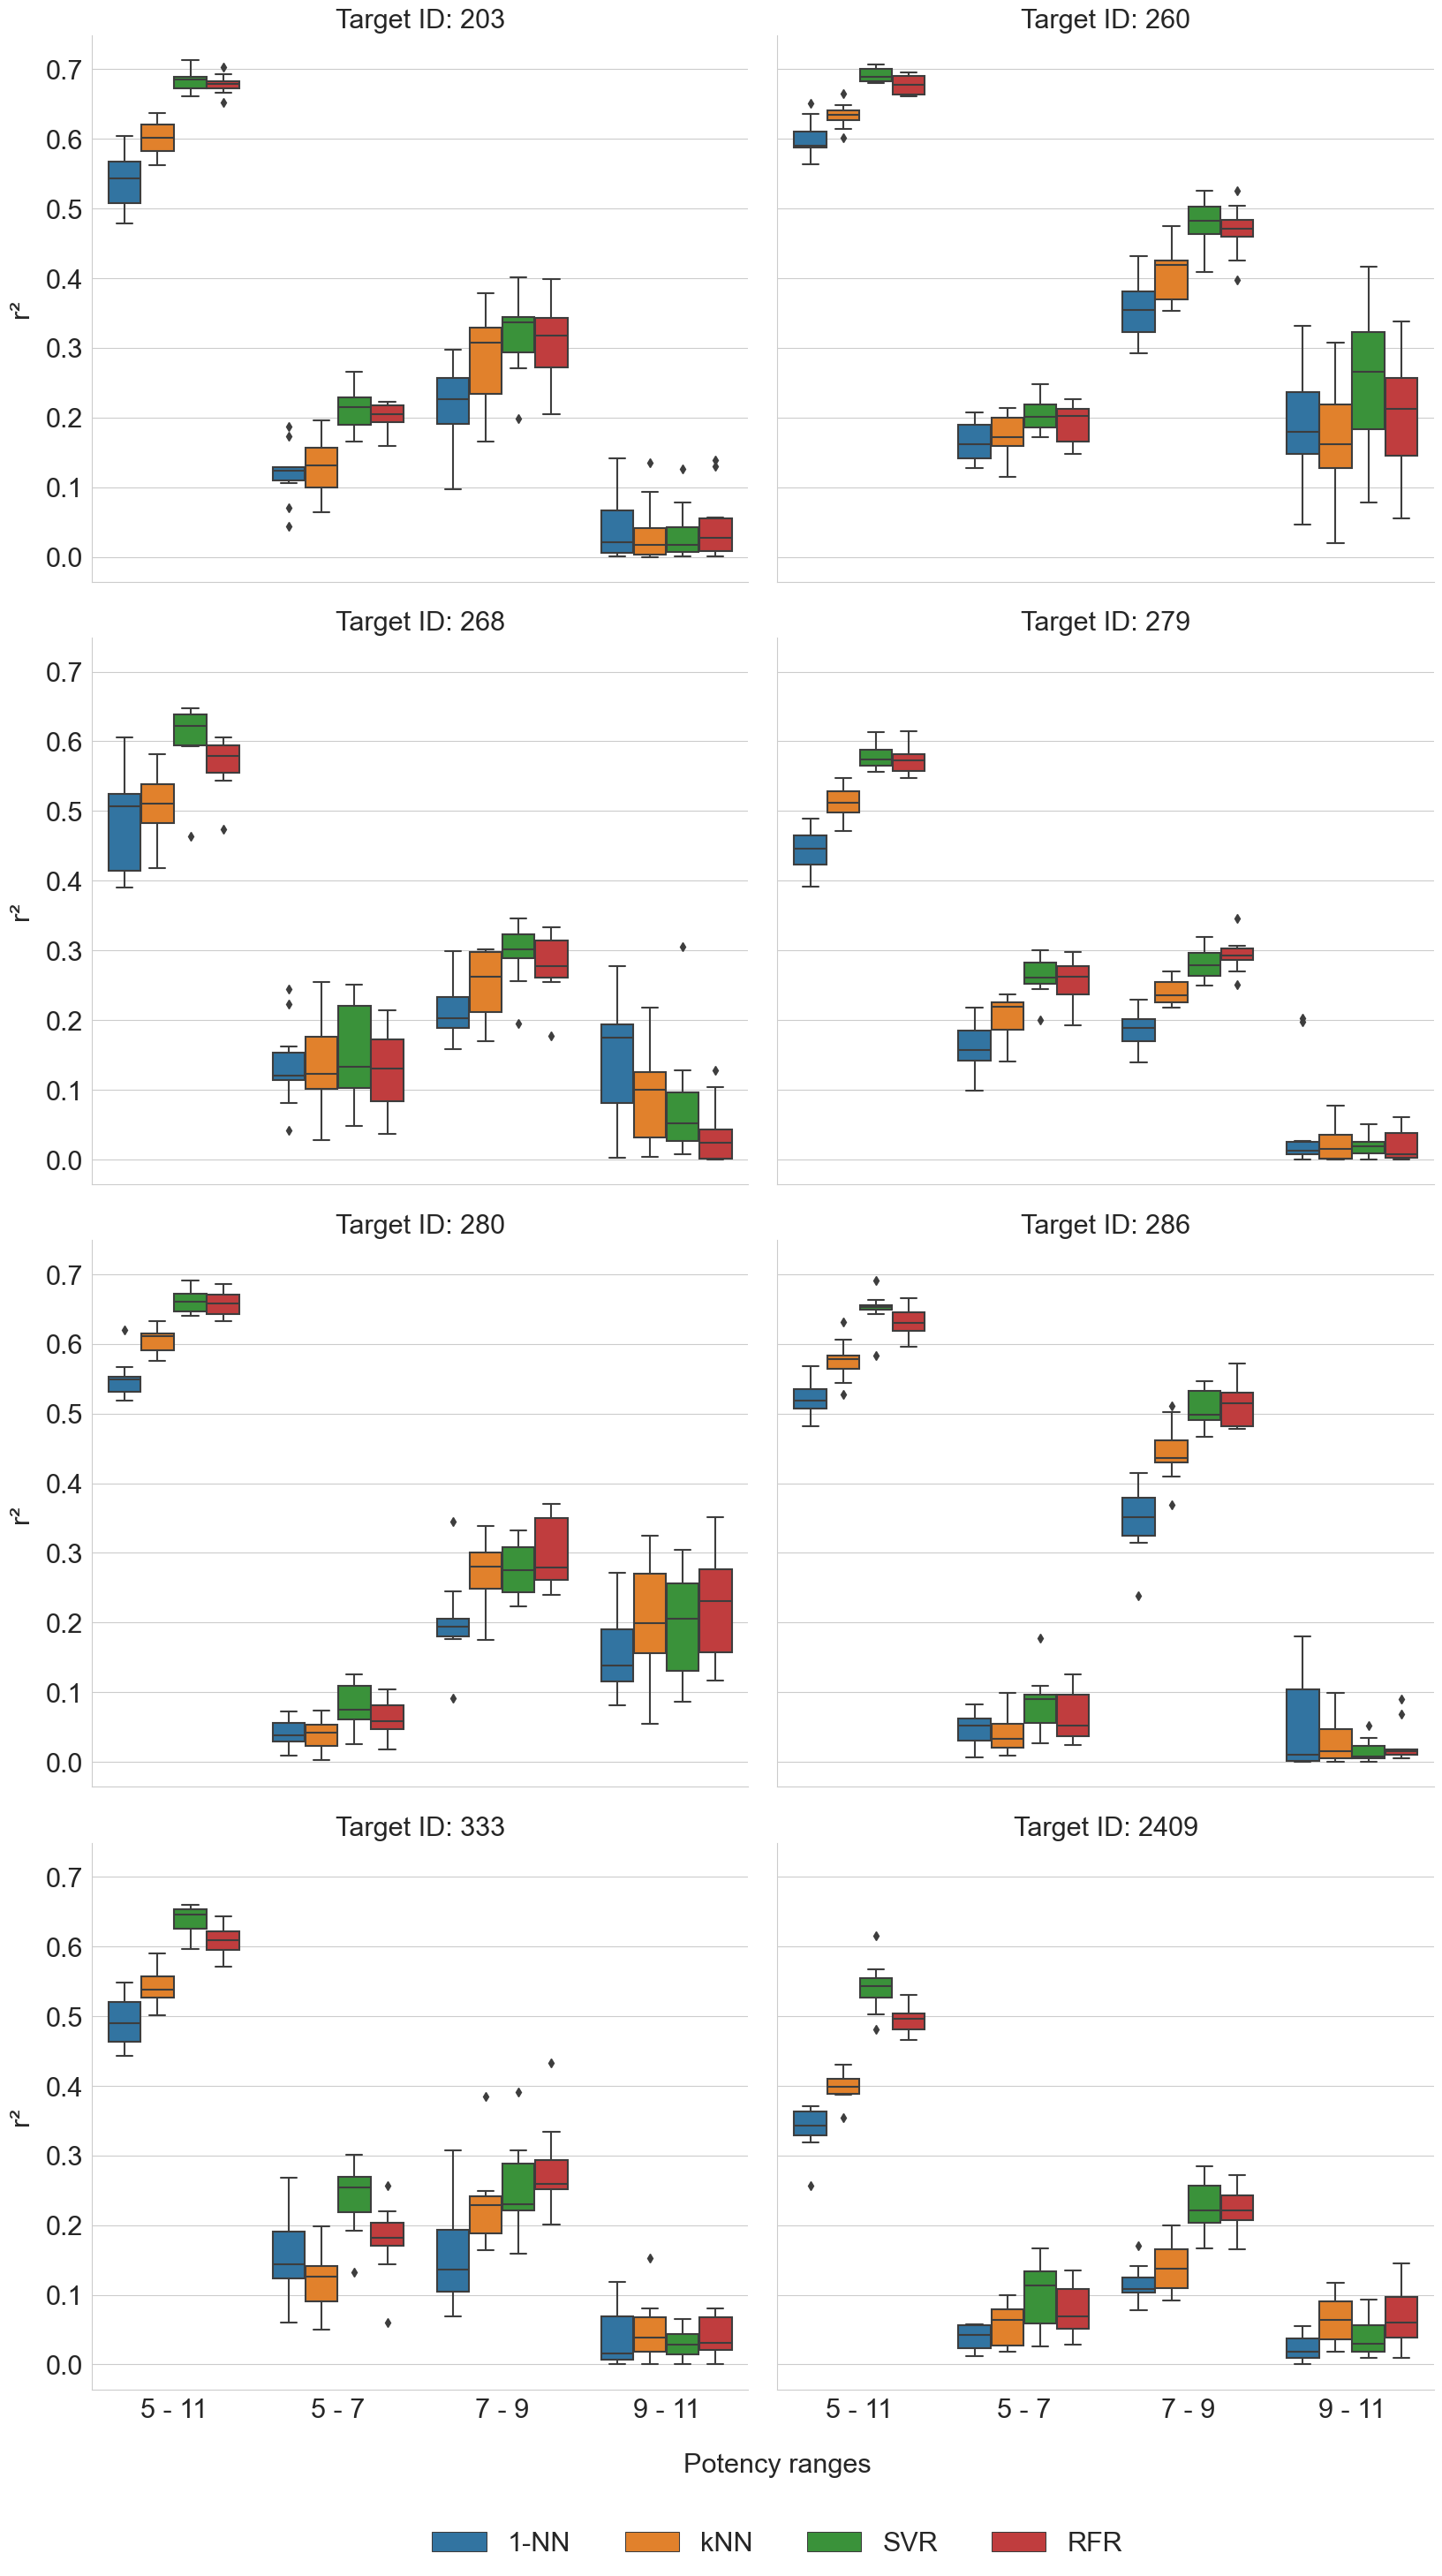

In [18]:
for i, metric_ind in zip(["c"], ["r²"]):
    plot_regression_models_cat(results_pc_tid, [metric_ind], x='Potency classes', y='Value',
                               col='Target ID',
                               hue = 'Algorithm', hue_order=['1-NN', 'kNN', 'SVR', 'RFR'], order=['5 - 11', '5 - 7', '7 - 9', '9 - 11'], #
                               aspect=1.2, height=7,
                               palette='tab10',
                               y_labels= f'{metric_ind}',
                               font_size=22,
                               row=None, col_wrap=2,
                               sharey='row',
                               #yticks=[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5],
                               bbox_to_anchor=(-0.0, -0.35),
                               #results_path=figure_path, filename=f'S{i}', 
                               legend_title='Potency ranges',
                               )

# Plot Fig3

In [20]:
results_pc_tids = results_pc_tid_final.loc[results_pc_tid_final['Target ID'].isin([203, 280, 2409])]
results_pc_tids.rename(columns={'potency_class': 'Potency class'}, inplace=True)

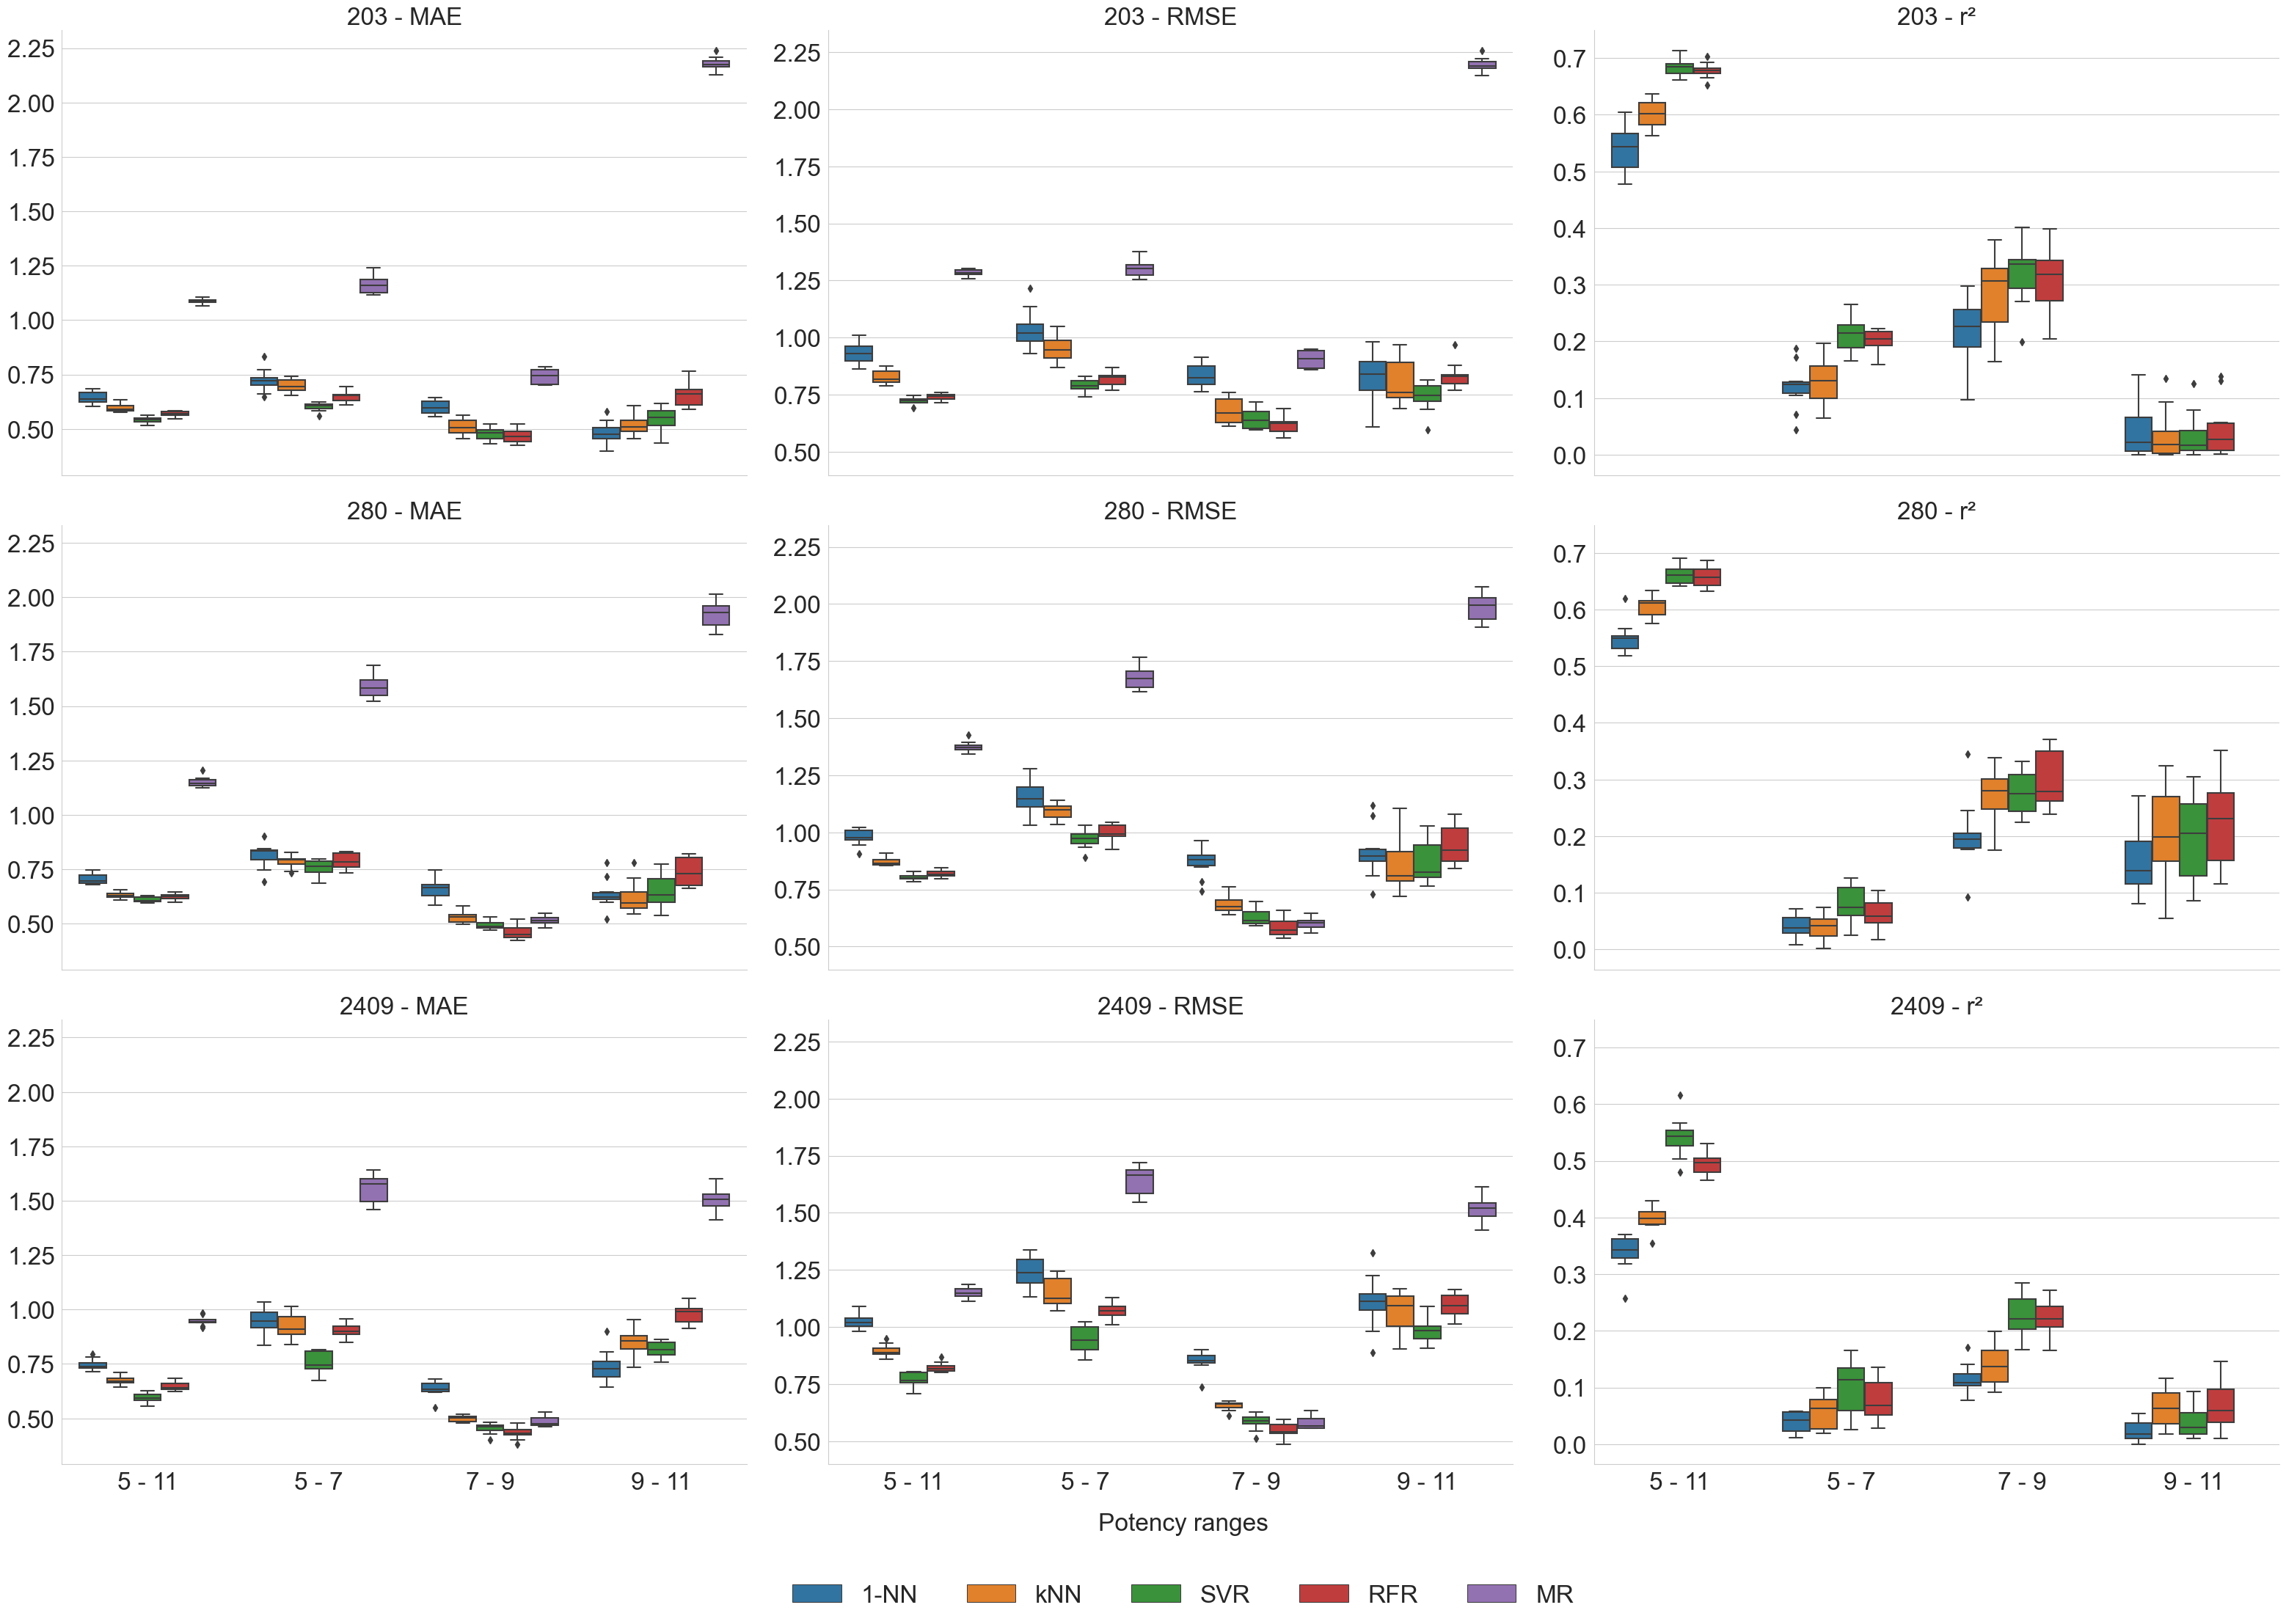

In [21]:
plot_regression_models_cat_mod(results_pc_tids, ['MAE', 'RMSE',"r²"], x='Potency class', y='Value',
                               col='Metric',
                               hue = 'Algorithm', hue_order=['1-NN', 'kNN', 'SVR', 'RFR', 'MR'],
                               order=['5 - 11', '5 - 7', '7 - 9', '9 - 11'],
                               aspect=1.5, height=7, col_nr=3,
                               palette='tab10',
                               font_size=24,
                               row='Target ID',
                               sharey='col',
                               y_labels='',
                               bbox_to_anchor=(-0.6, -0.37), legend_title='Potency ranges',
                               #results_path=figure_path, filename=f'F3'
                               )

# Load data Training set of increasing size

In [22]:
# Results path
approach_b = 'Balanced'
approach_utut = 'Unbalanced'
main_folder_b = 'regression_models_increase_tr_sizes_3_bins_330'
result_path_b = f'./{main_folder_b}/{fingerprint}/{approach_b}/'
main_folder_utut = 'regression_models_increase_tr_sizes_3_bins_unbalanced'
result_path_utut = f'./{main_folder_utut}/{fingerprint}/{approach_utut}/'

# Performance Test

In [23]:
# Load data
# performance Balanced
performance_test_df_b = pd.read_csv(os.path.join(result_path_b, f'performance_test.csv'), index_col=False)
performance_test_df_b['Approach'] = 'BTR-BTE'
# performance Balanced
performance_test_df_utut = pd.read_csv(os.path.join(result_path_utut, f'performance_test.csv'), index_col=False)
performance_test_df_utut['Approach'] = 'UTR-UTE'

In [24]:
performance_test_df_final = pd.concat([performance_test_df_b, performance_test_df_utut])
performance_test_df_final

,Target ID,Algorithm,Dataset size,Metric,Value,trial,Approach,Training size
0,280,1-NN,165,MAE,1.573490,0,BTR-BTE,6
1,280,1-NN,165,MSE,4.315903,0,BTR-BTE,6
2,280,1-NN,165,R2,-0.873813,0,BTR-BTE,6
3,280,1-NN,165,RMSE,2.077475,0,BTR-BTE,6
4,280,1-NN,165,r,0.044013,0,BTR-BTE,6
...,...,...,...,...,...,...,...,...
6474,2409,RFR,897,r,0.635417,9,UTR-UTE,330
6475,2409,MR,897,MAE,0.938826,9,UTR-UTE,330
6476,2409,MR,897,MSE,1.270591,9,UTR-UTE,330
6477,2409,MR,897,R2,-0.004561,9,UTR-UTE,330


# Predictions Test

In [25]:
predictions_test_df_btr_bte = pd.read_csv(os.path.join(result_path_b, f'predictions_test.csv'), index_col=False)
predictions_test_df_btr_bte['potency_class'] = potency_classes(predictions_test_df_btr_bte.Experimental.values, [5,7,9,11])
predictions_test_df_btr_bte['dataset'] = 'Test'

In [26]:
predictions_test_df_utr_ute = pd.read_csv(os.path.join(result_path_utut, f'predictions_test.csv'), index_col=False)
predictions_test_df_utr_ute['potency_class'] = potency_classes(predictions_test_df_utr_ute.Experimental.values, [5,7,9,11])
predictions_test_df_utr_ute['dataset'] = 'Test'

# Balanced TR/ Balanced TE

In [27]:
results_pc = metrics_potency_classes(predictions_test_df_btr_bte)
results_pc.potency_class.replace({5:'5 - 7', 7:'7 - 9', 9: '9 - 11'}, inplace=True)

# Unbalanced TR/ Unbalanced TE

In [28]:
results_pc_ut_ut = metrics_potency_classes(predictions_test_df_utr_ute)
results_pc_ut_ut.potency_class.replace({5:'5 - 7', 7:'7 - 9', 9: '9 - 11'}, inplace=True)

# Plot Fig4

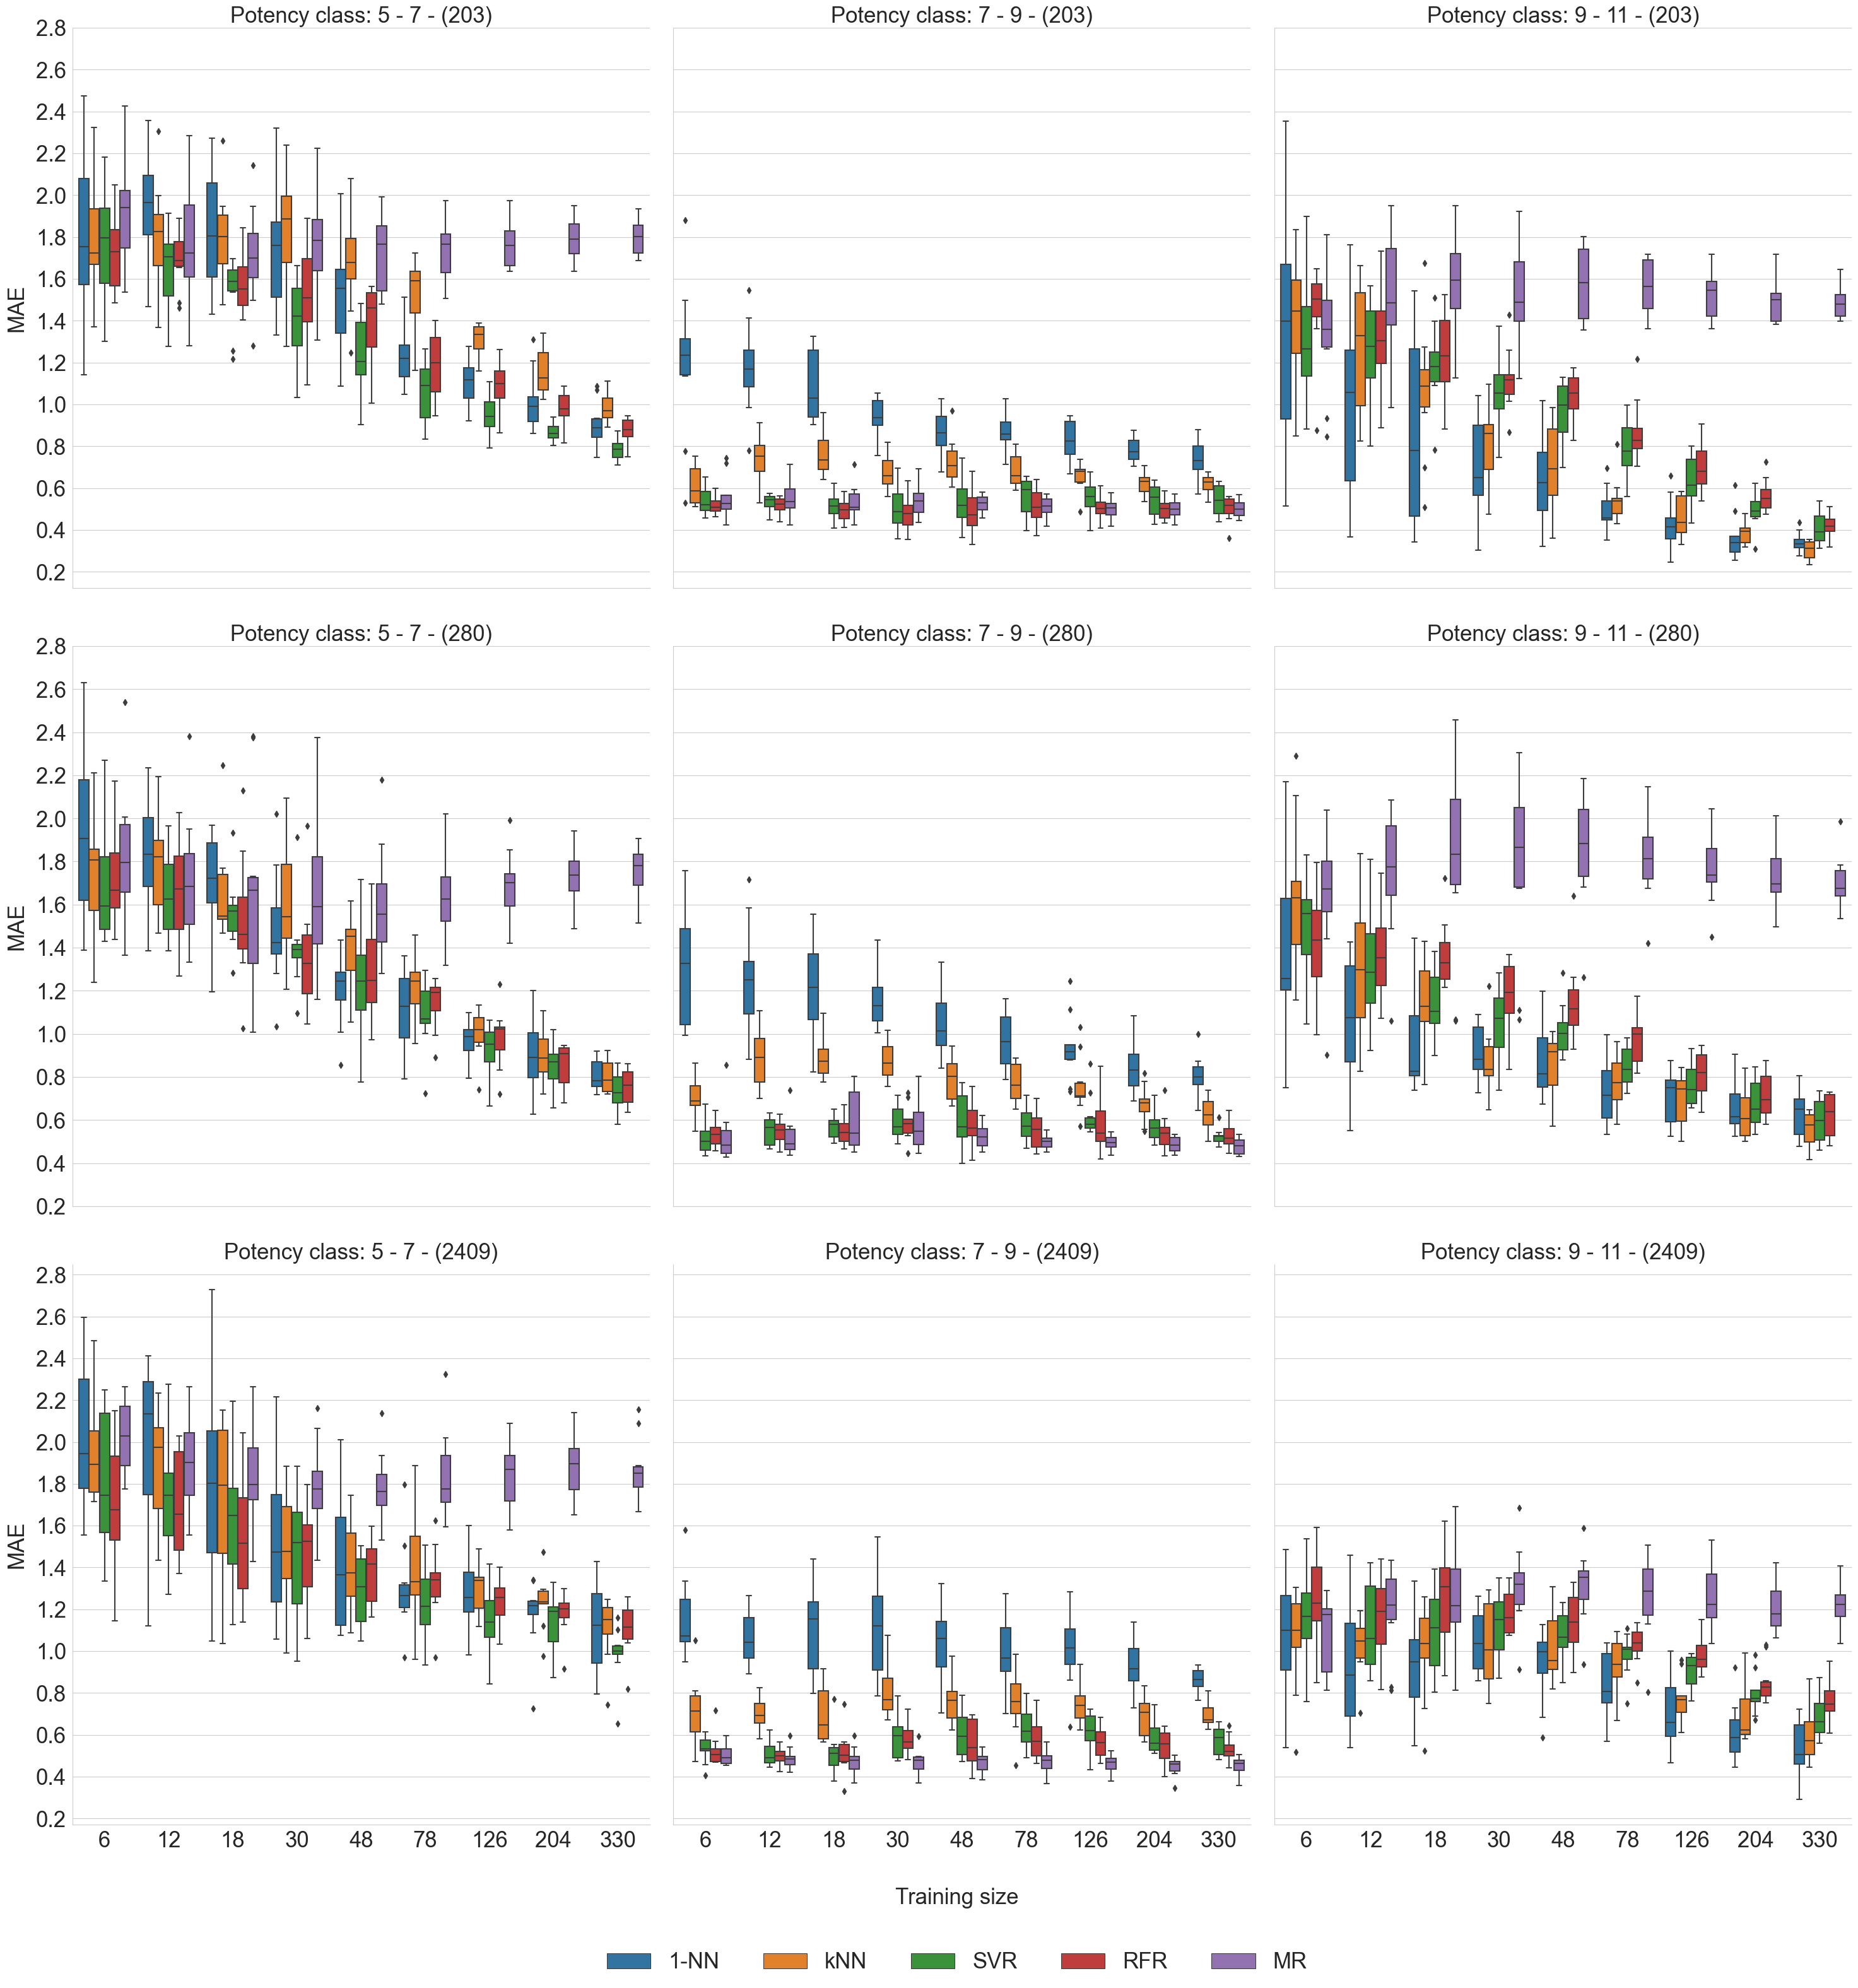

In [29]:
results_pc_tid = results_pc.copy()
results_pc_tid.rename(columns={'potency_class': 'Potency class'}, inplace=True)
metric_ind = 'MAE'
plot_regression_models_cat(results_pc_tid, [metric_ind], x='Training size', y='Value',
                           col='Potency class',
                           hue = 'Algorithm', hue_order=['1-NN', 'kNN', 'SVR', 'RFR', 'MR'],
                           aspect=1, height=10, col_nr=3, width=0.8,
                           palette='tab10',
                           y_labels= f'{metric_ind}',
                           font_size=25, row="Target ID",
                           sharey='row',
                           yticks=[0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8],
                           bbox_to_anchor=(-0.55, -0.3), title=True,
                           legend_title='Training size',
                           #results_path=figure_path, filename=f'F4'
                           )

# Plot S4

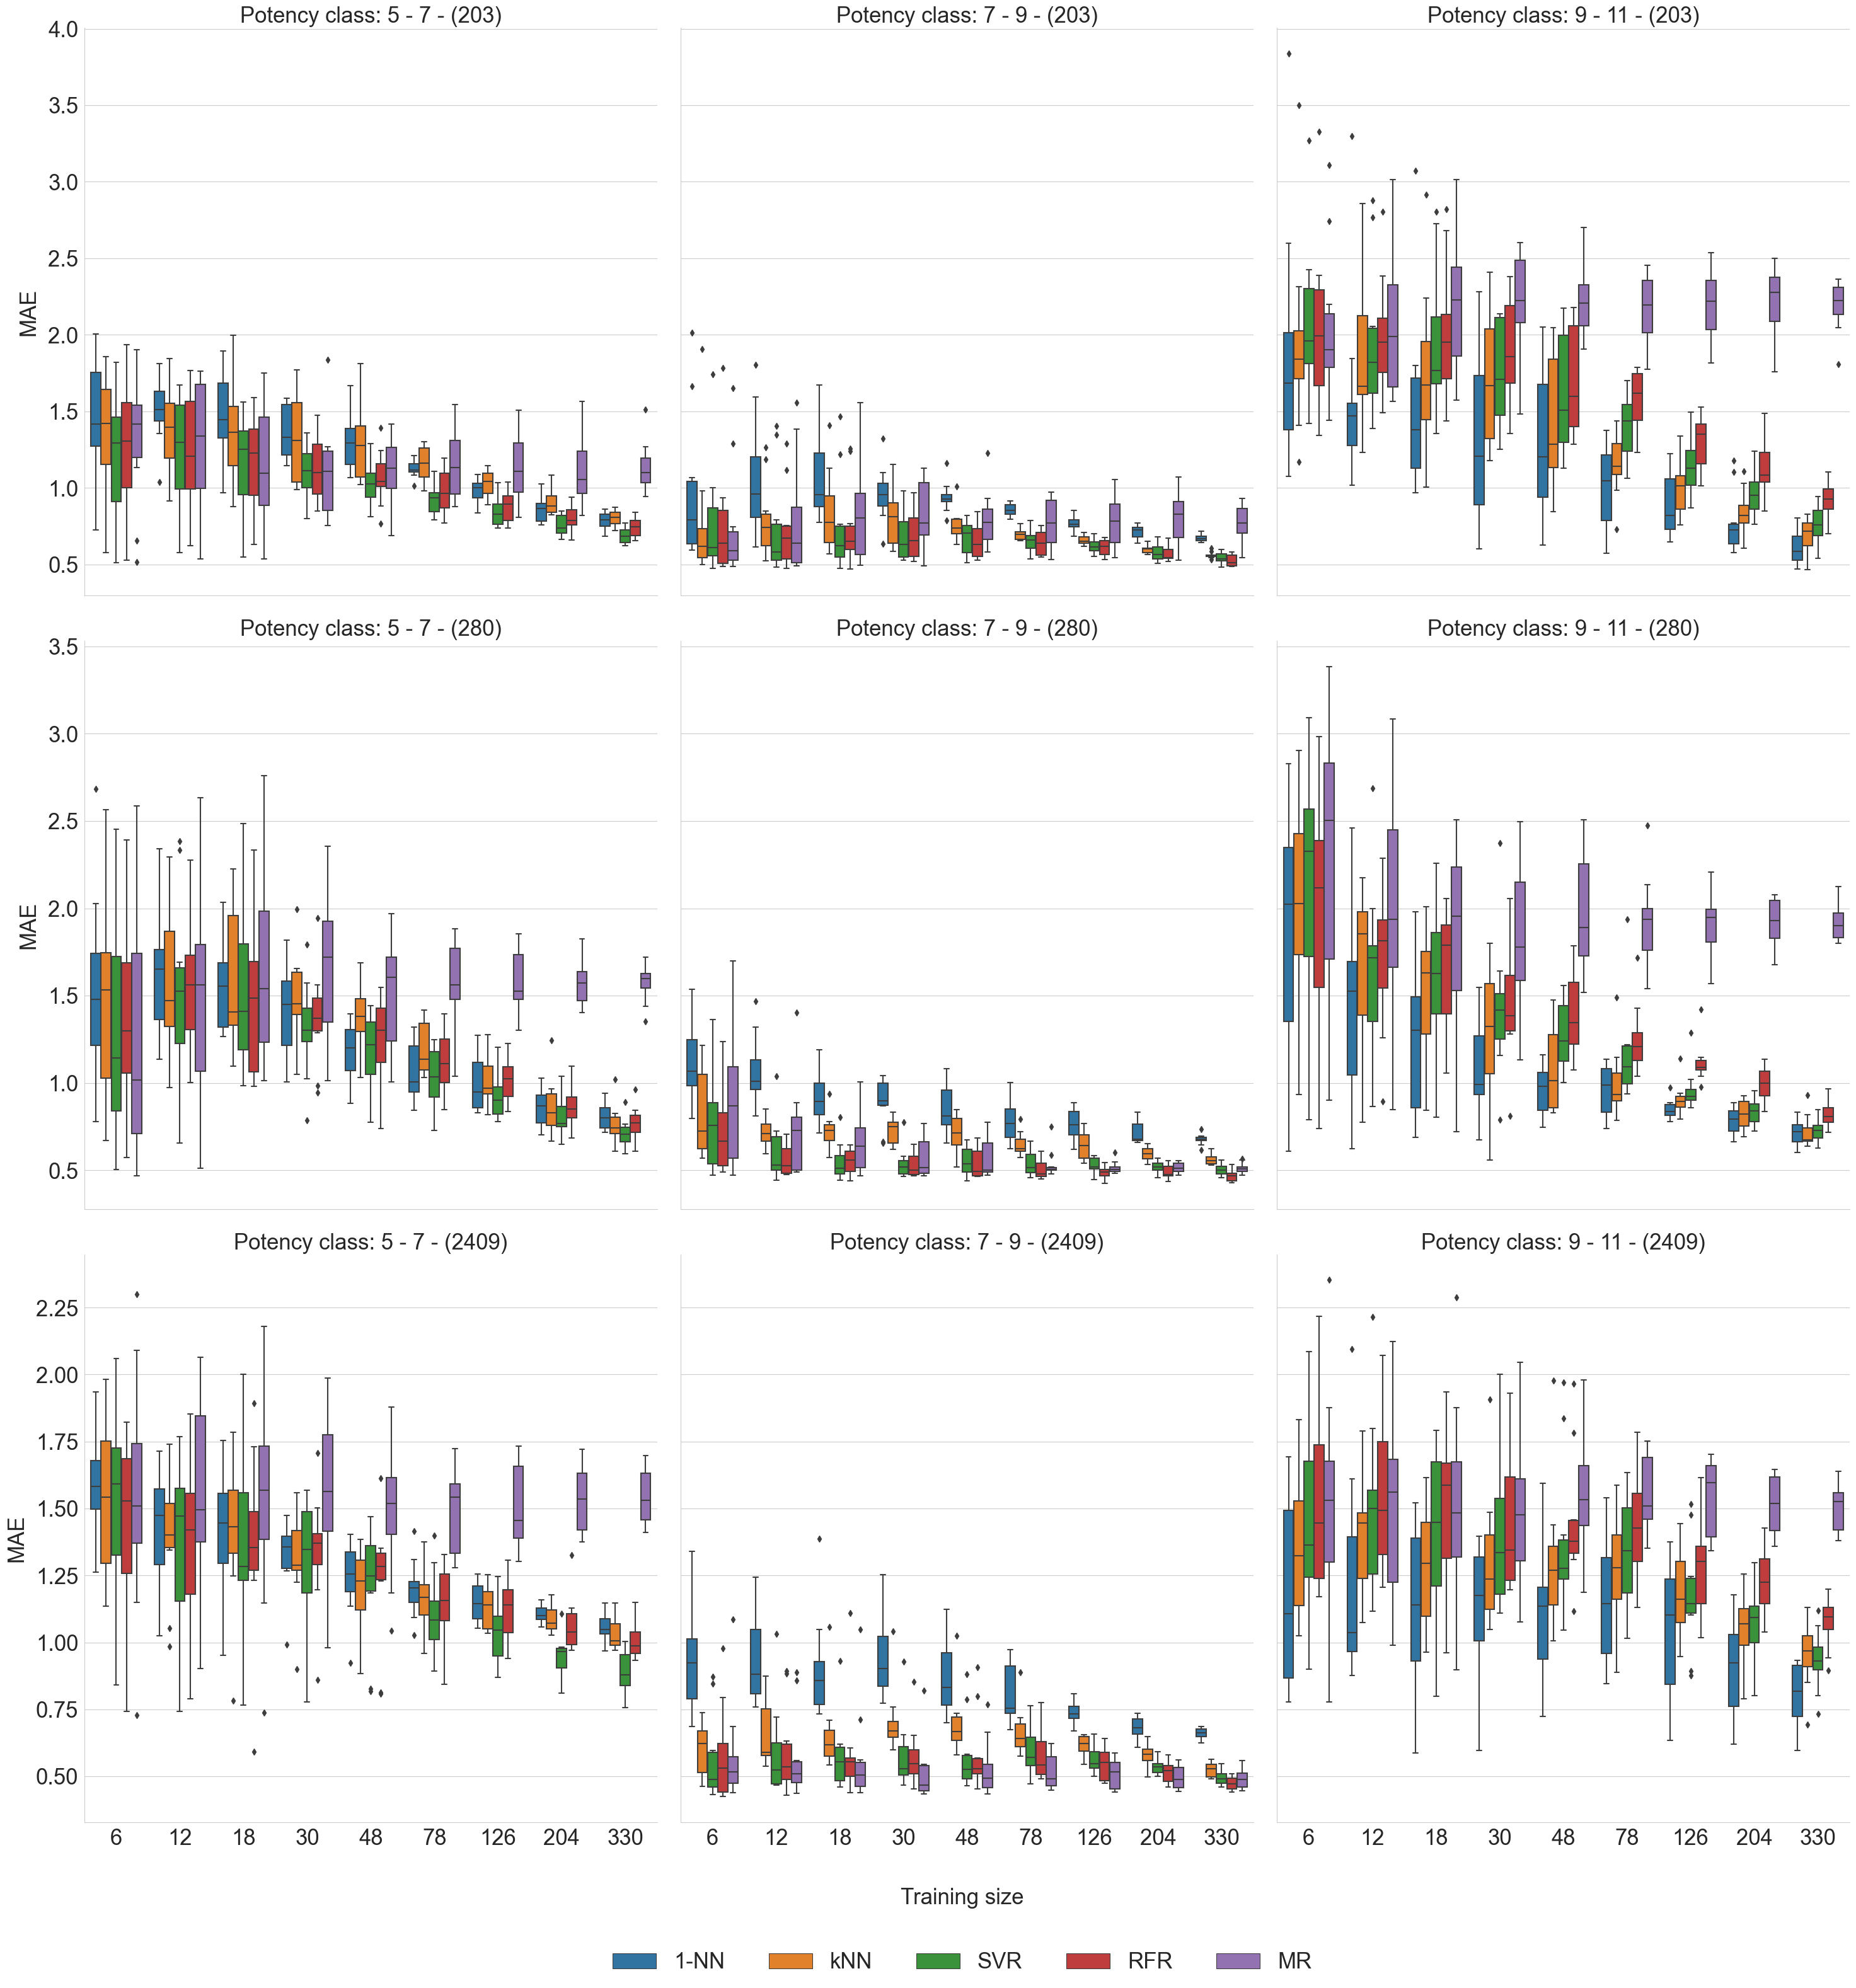

In [30]:
results_pc_tid_ut_ut = results_pc_ut_ut.copy()
results_pc_tid_ut_ut.rename(columns={'potency_class': 'Potency class'}, inplace=True)
metric_ind = 'MAE'
plot_regression_models_cat(results_pc_tid_ut_ut, [metric_ind], x='Training size', y='Value',
                           col='Potency class',
                           hue = 'Algorithm', hue_order=['1-NN', 'kNN', 'SVR', 'RFR', 'MR'],
                           aspect=1, height=10, col_nr=3, width=0.8,
                           palette='tab10',
                           y_labels= f'{metric_ind}',
                           font_size=25, row="Target ID",
                           sharey='row',
                           #yticks=[0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8],
                           bbox_to_anchor=(-0.55, -0.3), title=True,
                           legend_title='Training size',
                           #sub_fig_title='b',
                           #results_path=figure_path, filename=f'S4_a'
                           )

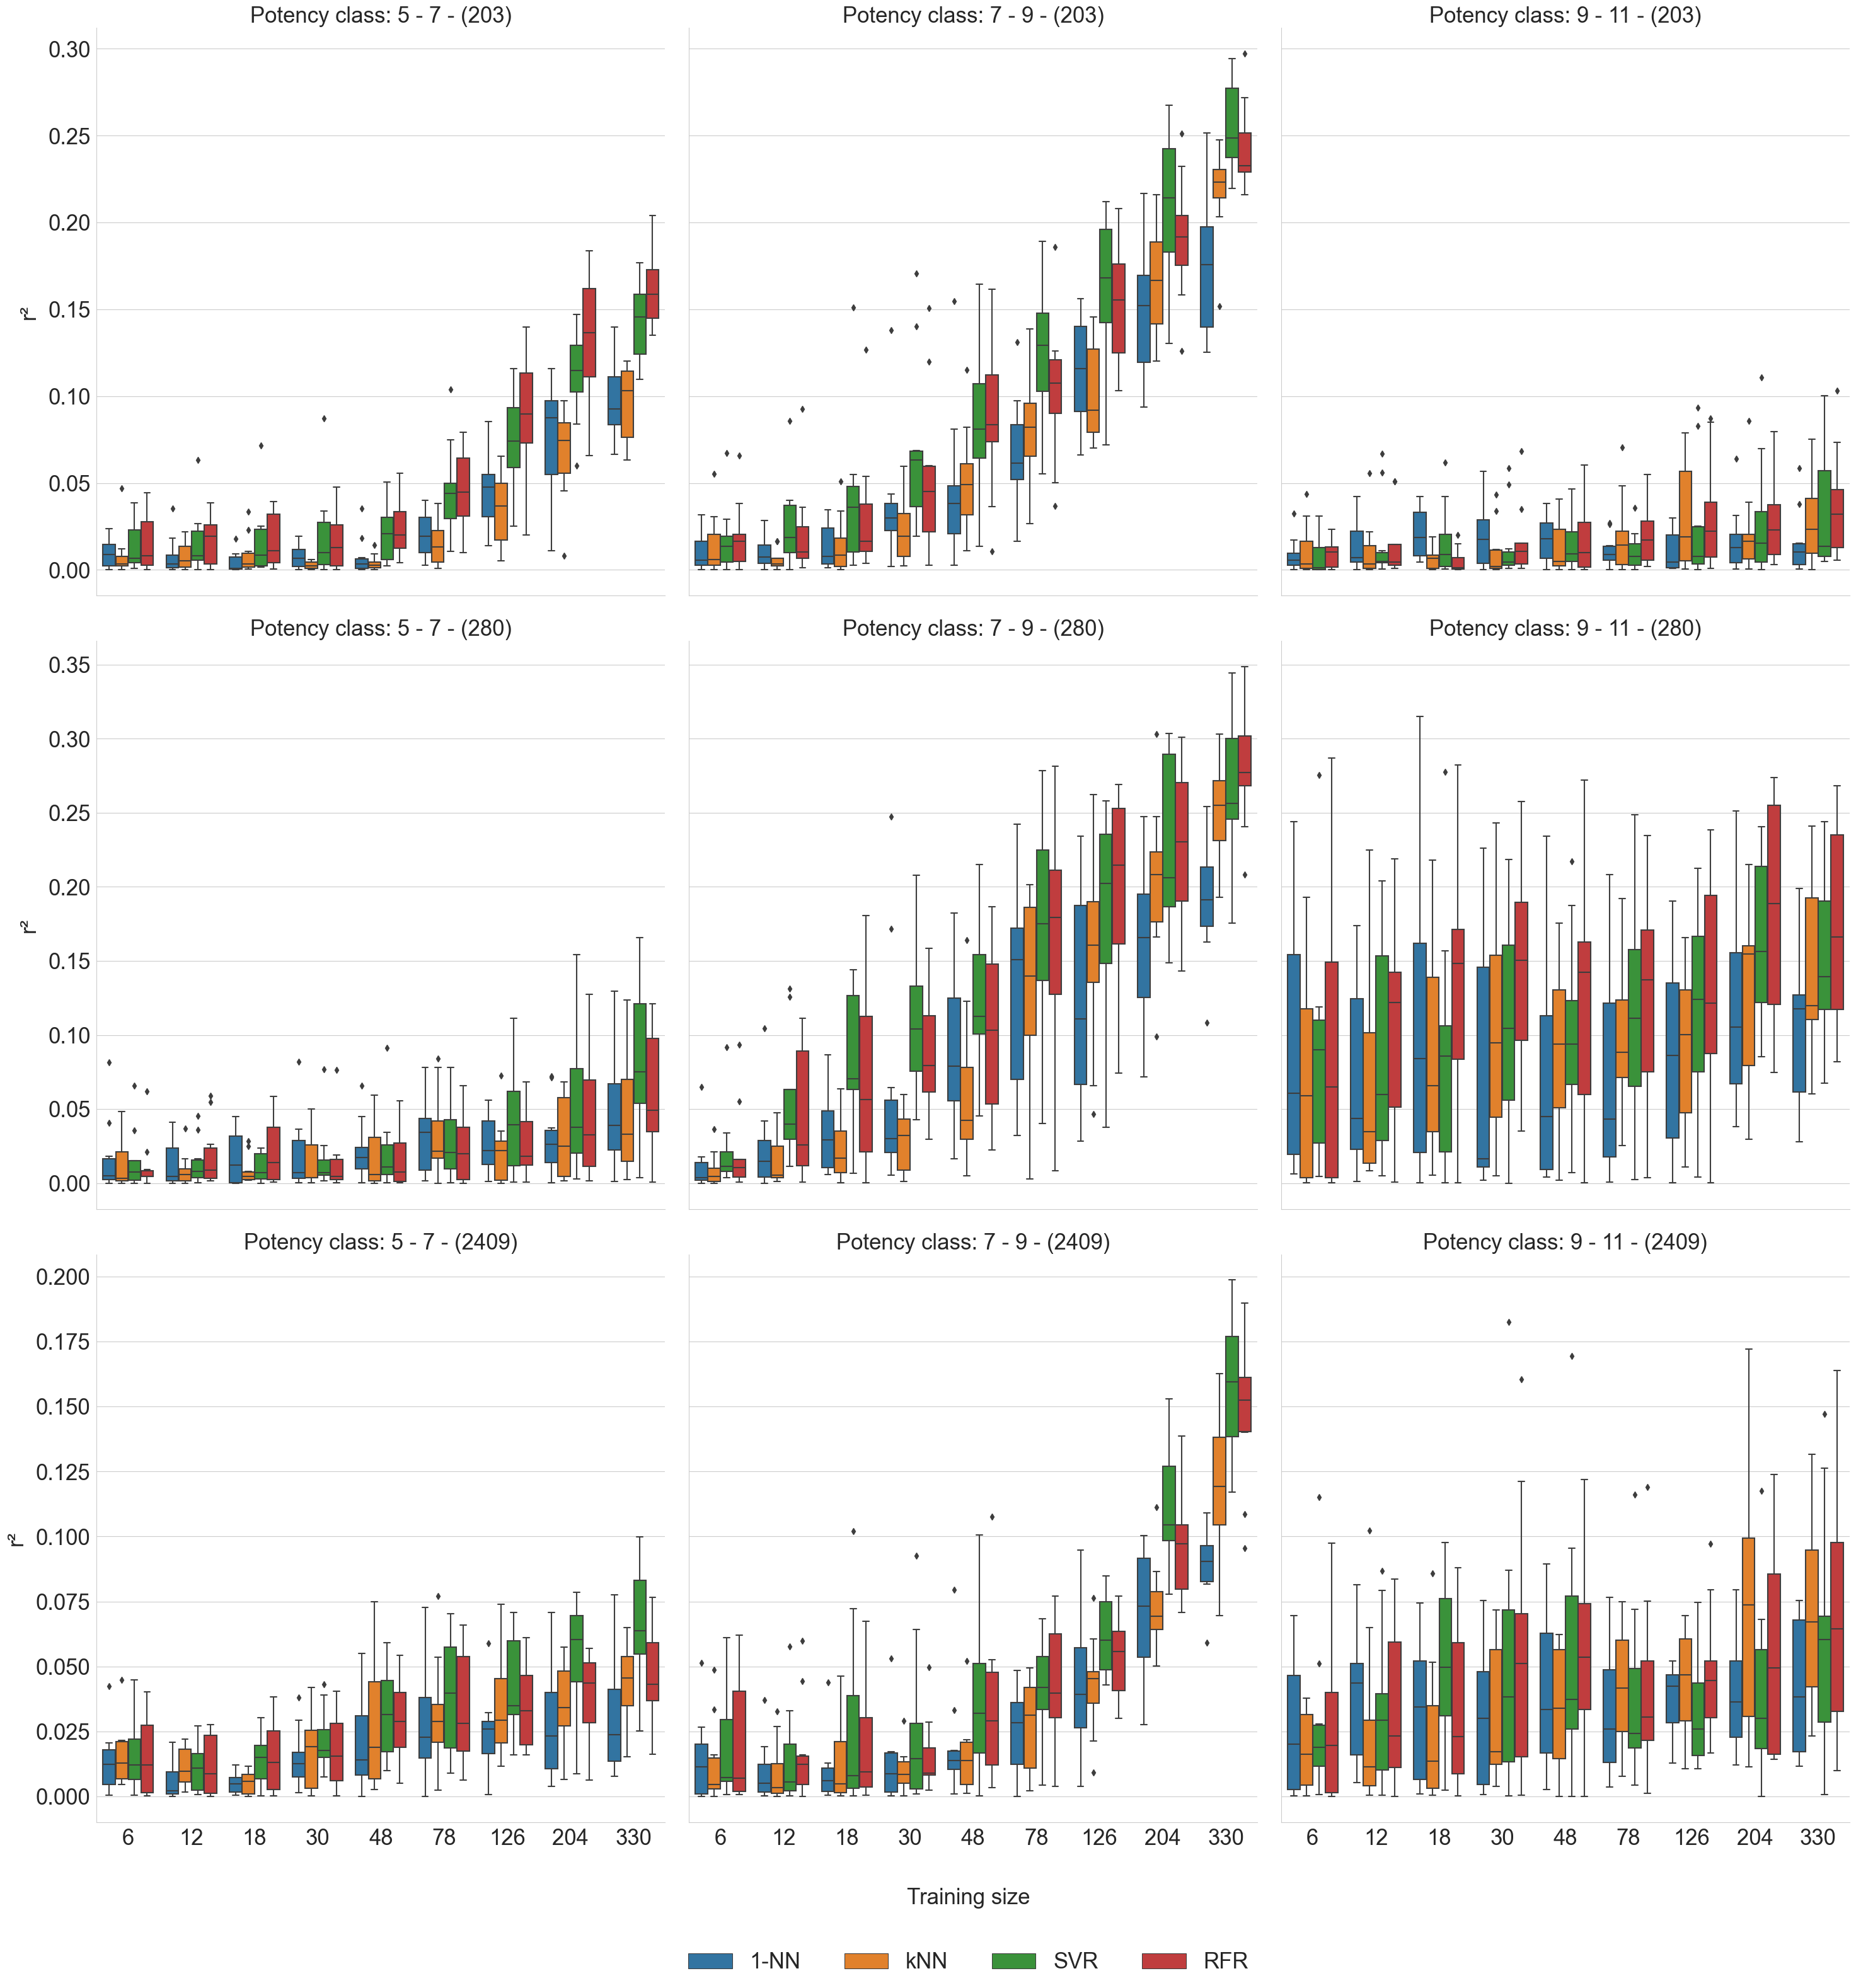

In [31]:
results_pc_tid_ut_ut_b = results_pc_ut_ut.copy()
results_pc_tid_ut_ut_b.rename(columns={'potency_class': 'Potency class'}, inplace=True)
metric_ind = "r²"
plot_regression_models_cat(results_pc_tid_ut_ut_b, [metric_ind], x='Training size', y='Value',
                           col='Potency class',
                           hue = 'Algorithm', hue_order=['1-NN', 'kNN', 'SVR', 'RFR',],
                           aspect=1, height=10, col_nr=3, width=0.8,
                           palette='tab10',
                           y_labels= f'{metric_ind}',
                           font_size=25, row="Target ID",
                           sharey='row',
                           bbox_to_anchor=(-0.55, -0.3), title=True,
                           legend_title='Training size',
                           #sub_fig_title='b',
                           #results_path=figure_path, filename=f'S4_b'
                           )

# Fig5

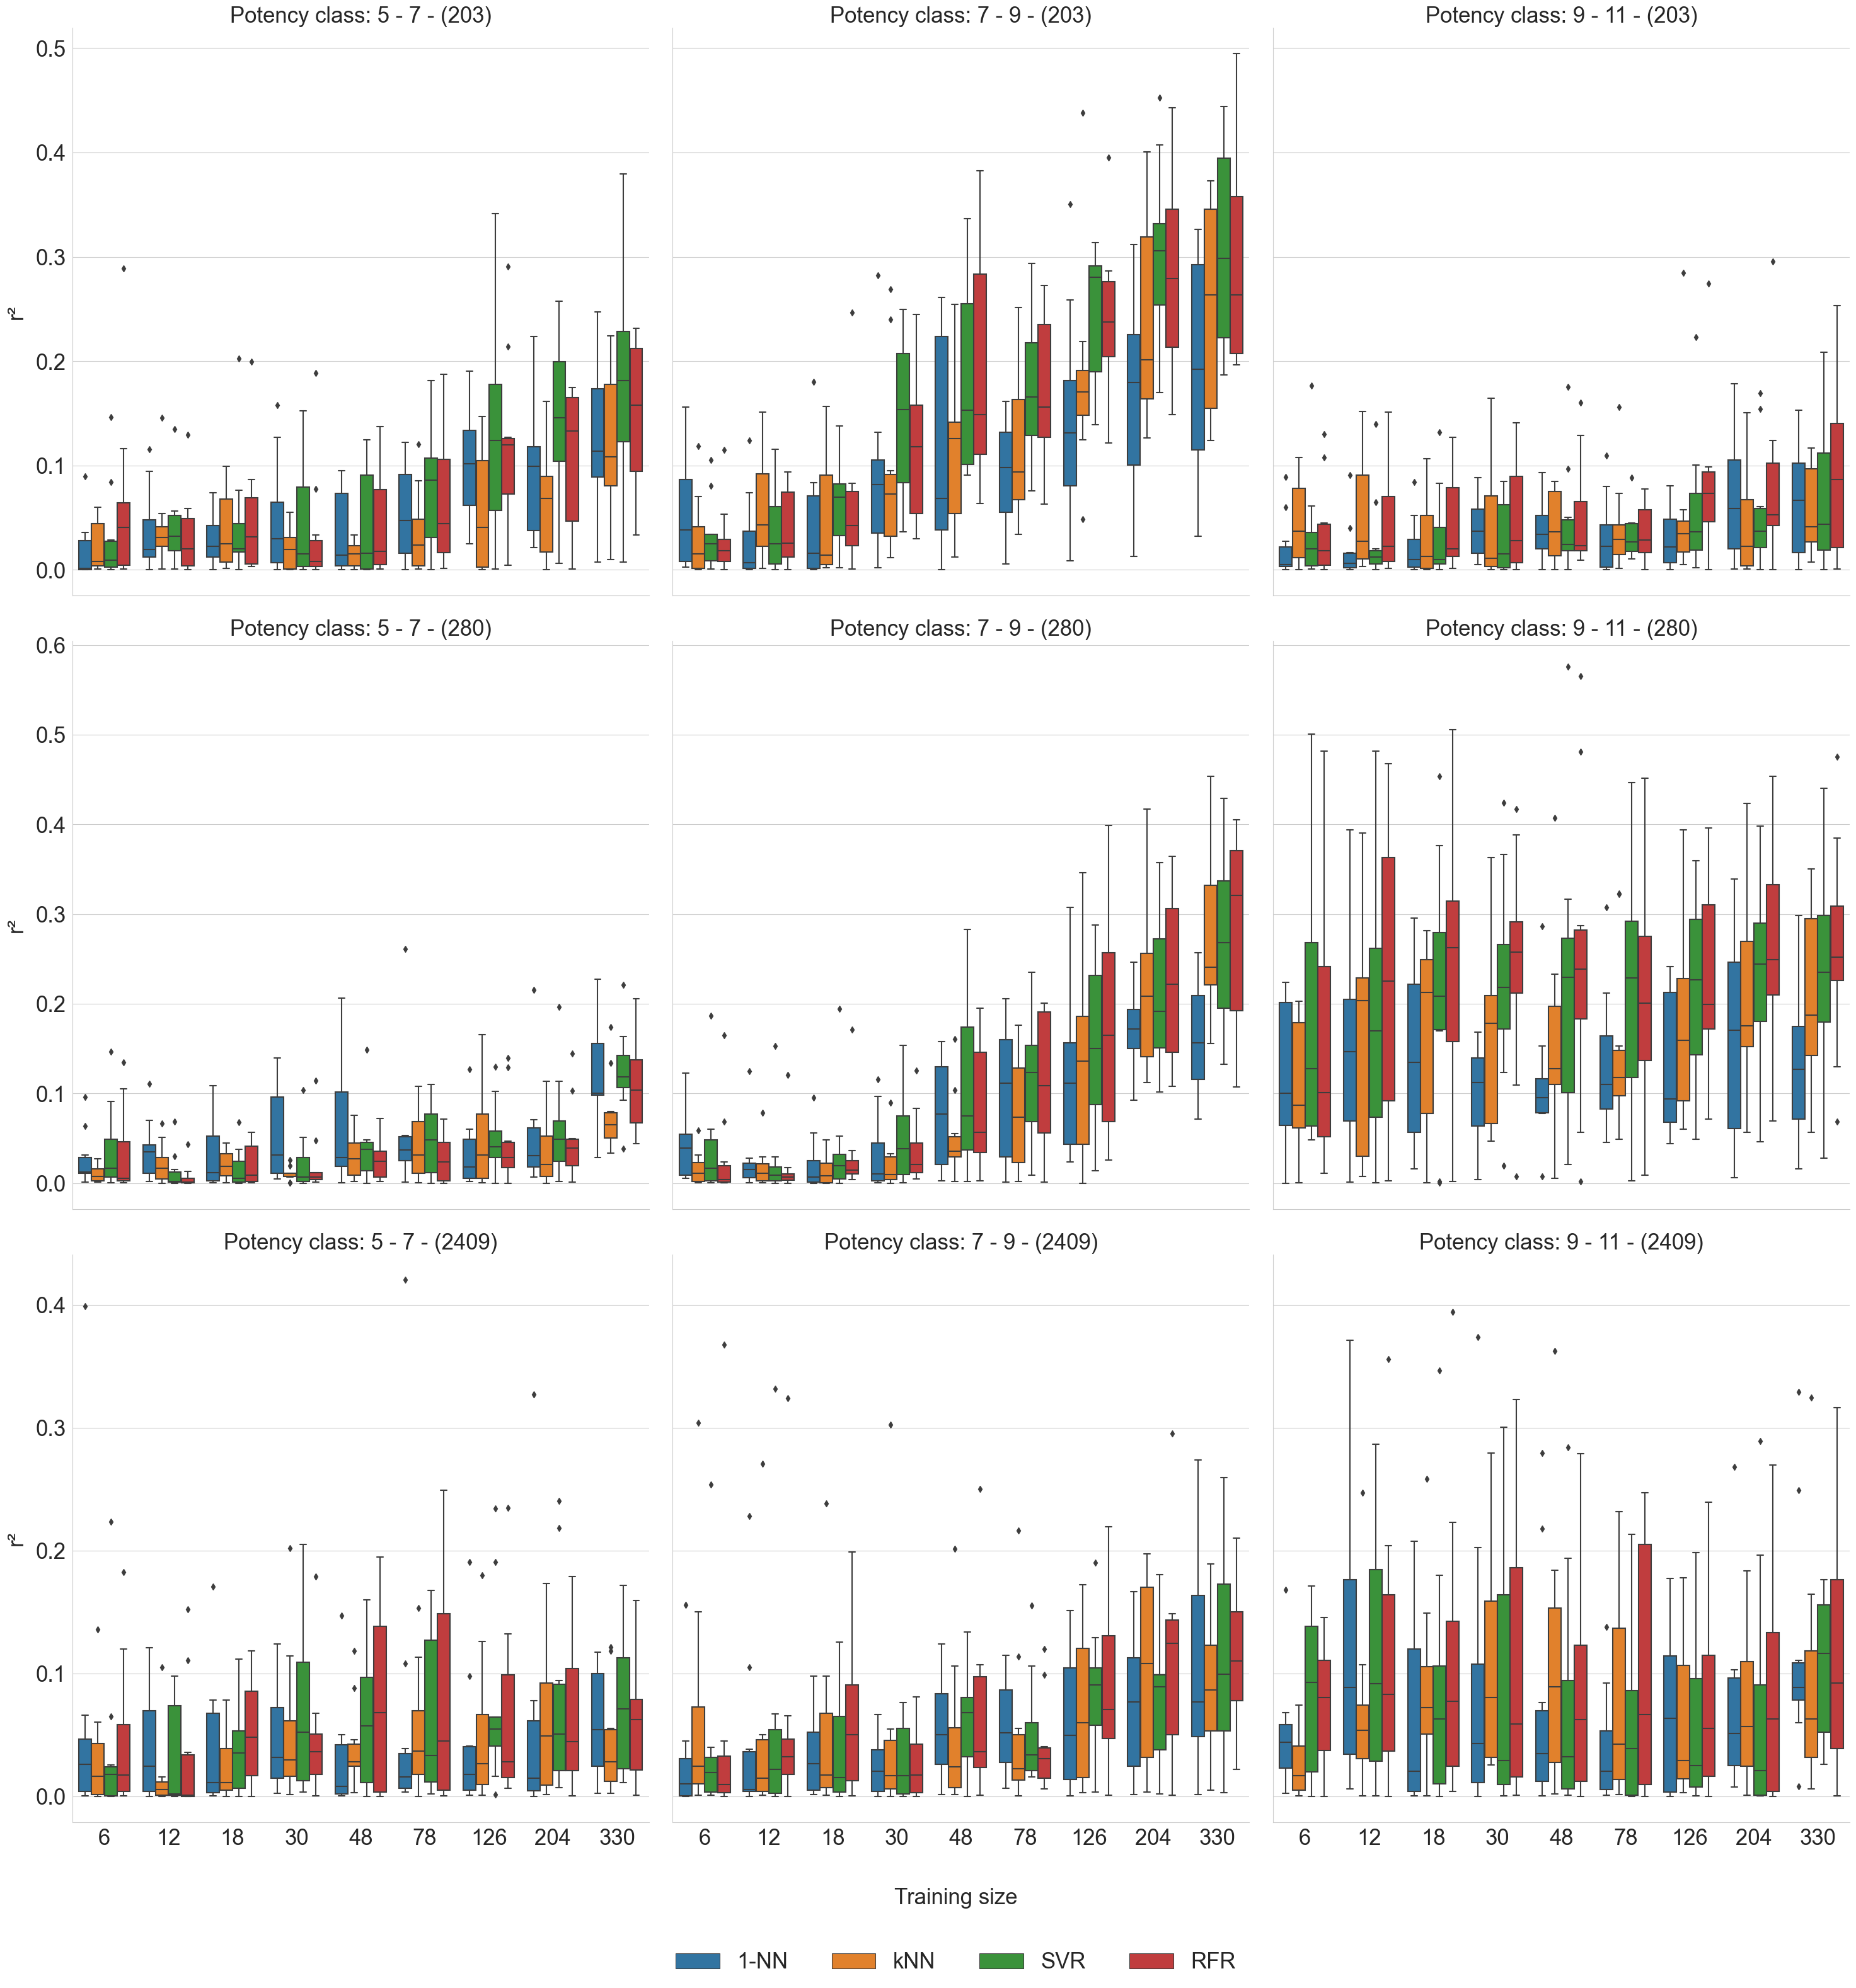

In [32]:
results_pc_tid = results_pc.copy()
results_pc_tid.rename(columns={'potency_class': 'Potency class'}, inplace=True)
metric_ind = "r²"
plot_regression_models_cat(results_pc_tid, [metric_ind], x='Training size', y='Value',
                           col='Potency class',
                           hue = 'Algorithm', hue_order=['1-NN', 'kNN', 'SVR', 'RFR'],
                           aspect=1, height=10, col_nr=3, width=0.8,
                           palette='tab10',
                           y_labels= f'{metric_ind}',
                           font_size=25, row="Target ID",
                           sharey='row',
                           bbox_to_anchor=(-0.55, -0.3), title=True,
                           legend_title='Training size',
                           #results_path=figure_path, filename=f'F5'
                           )

# Statistical Analysis Fig S3

In [33]:
import scipy.stats as st
from itertools import combinations

mut_result = []
for target in results_pc_tid_final['Target ID'].unique()[:]:
    for df_analysis in [results_pc_tid_final]:
        for metric in ['MAE', 'RMSE', 'r²']:
            df_ = df_analysis.loc[(df_analysis['Target ID'] == target) & (df_analysis['Metric'] == f'{metric}')]
            for i, pc in enumerate(['5 - 11', '5 - 7', '7 - 9','9 - 11']):
                df = df_.loc[df_.potency_class == pc]
                if metric == 'r²':
                    algort = ['1-NN','kNN','SVR', 'RFR']
                else:
                    algort = ['1-NN','kNN','SVR', 'RFR', 'MR']
                for alg in combinations(algort, 2):
                    print(alg)
                    alg1 = df.query(f'Algorithm == "{alg[0]}"')['Value']
                    alg2 = df.query(f'Algorithm == "{alg[1]}"')['Value']

                    df_1 = pd.DataFrame(list(zip(alg1, alg2)), columns=[f'{alg[0]} {target}', f'{alg[1]} {target}'])
                    stats, p_value = st.wilcoxon(list(alg1),list(alg2))
                    mut_result_dict = {"Algorithms": f'{alg[0]} / {alg[1]}',
                                       "Potency range": pc,
                                       "Metric": metric,
                                       "Target ID": target,
                                       "p_value":round(p_value, 3),
                                       'figure':i,
                                       'approach': approach}
                    mut_result.append(mut_result_dict)
mut_result = pd.DataFrame(mut_result)
display(mut_result)

('1-NN', 'kNN')
('1-NN', 'SVR')
('1-NN', 'RFR')
('1-NN', 'MR')
('kNN', 'SVR')
('kNN', 'RFR')
('kNN', 'MR')
('SVR', 'RFR')
('SVR', 'MR')
('RFR', 'MR')
('1-NN', 'kNN')
('1-NN', 'SVR')
('1-NN', 'RFR')
('1-NN', 'MR')
('kNN', 'SVR')
('kNN', 'RFR')
('kNN', 'MR')
('SVR', 'RFR')
('SVR', 'MR')
('RFR', 'MR')
('1-NN', 'kNN')
('1-NN', 'SVR')
('1-NN', 'RFR')
('1-NN', 'MR')
('kNN', 'SVR')
('kNN', 'RFR')
('kNN', 'MR')
('SVR', 'RFR')
('SVR', 'MR')
('RFR', 'MR')
('1-NN', 'kNN')
('1-NN', 'SVR')
('1-NN', 'RFR')
('1-NN', 'MR')
('kNN', 'SVR')
('kNN', 'RFR')
('kNN', 'MR')
('SVR', 'RFR')
('SVR', 'MR')
('RFR', 'MR')
('1-NN', 'kNN')
('1-NN', 'SVR')
('1-NN', 'RFR')
('1-NN', 'MR')
('kNN', 'SVR')
('kNN', 'RFR')
('kNN', 'MR')
('SVR', 'RFR')
('SVR', 'MR')
('RFR', 'MR')
('1-NN', 'kNN')
('1-NN', 'SVR')
('1-NN', 'RFR')
('1-NN', 'MR')
('kNN', 'SVR')
('kNN', 'RFR')
('kNN', 'MR')
('SVR', 'RFR')
('SVR', 'MR')
('RFR', 'MR')
('1-NN', 'kNN')
('1-NN', 'SVR')
('1-NN', 'RFR')
('1-NN', 'MR')
('kNN', 'SVR')
('kNN', 'RFR')
('kNN',

,Algorithms,Potency range,Metric,Target ID,p_value,figure,approach
0,1-NN / kNN,5 - 11,MAE,333,0.002,0,Unbalanced
1,1-NN / SVR,5 - 11,MAE,333,0.002,0,Unbalanced
2,1-NN / RFR,5 - 11,MAE,333,0.002,0,Unbalanced
3,1-NN / MR,5 - 11,MAE,333,0.002,0,Unbalanced
4,kNN / SVR,5 - 11,MAE,333,0.002,0,Unbalanced
...,...,...,...,...,...,...,...
827,1-NN / SVR,9 - 11,r²,286,0.232,3,Unbalanced
828,1-NN / RFR,9 - 11,r²,286,0.432,3,Unbalanced
829,kNN / SVR,9 - 11,r²,286,0.432,3,Unbalanced
830,kNN / RFR,9 - 11,r²,286,1.000,3,Unbalanced


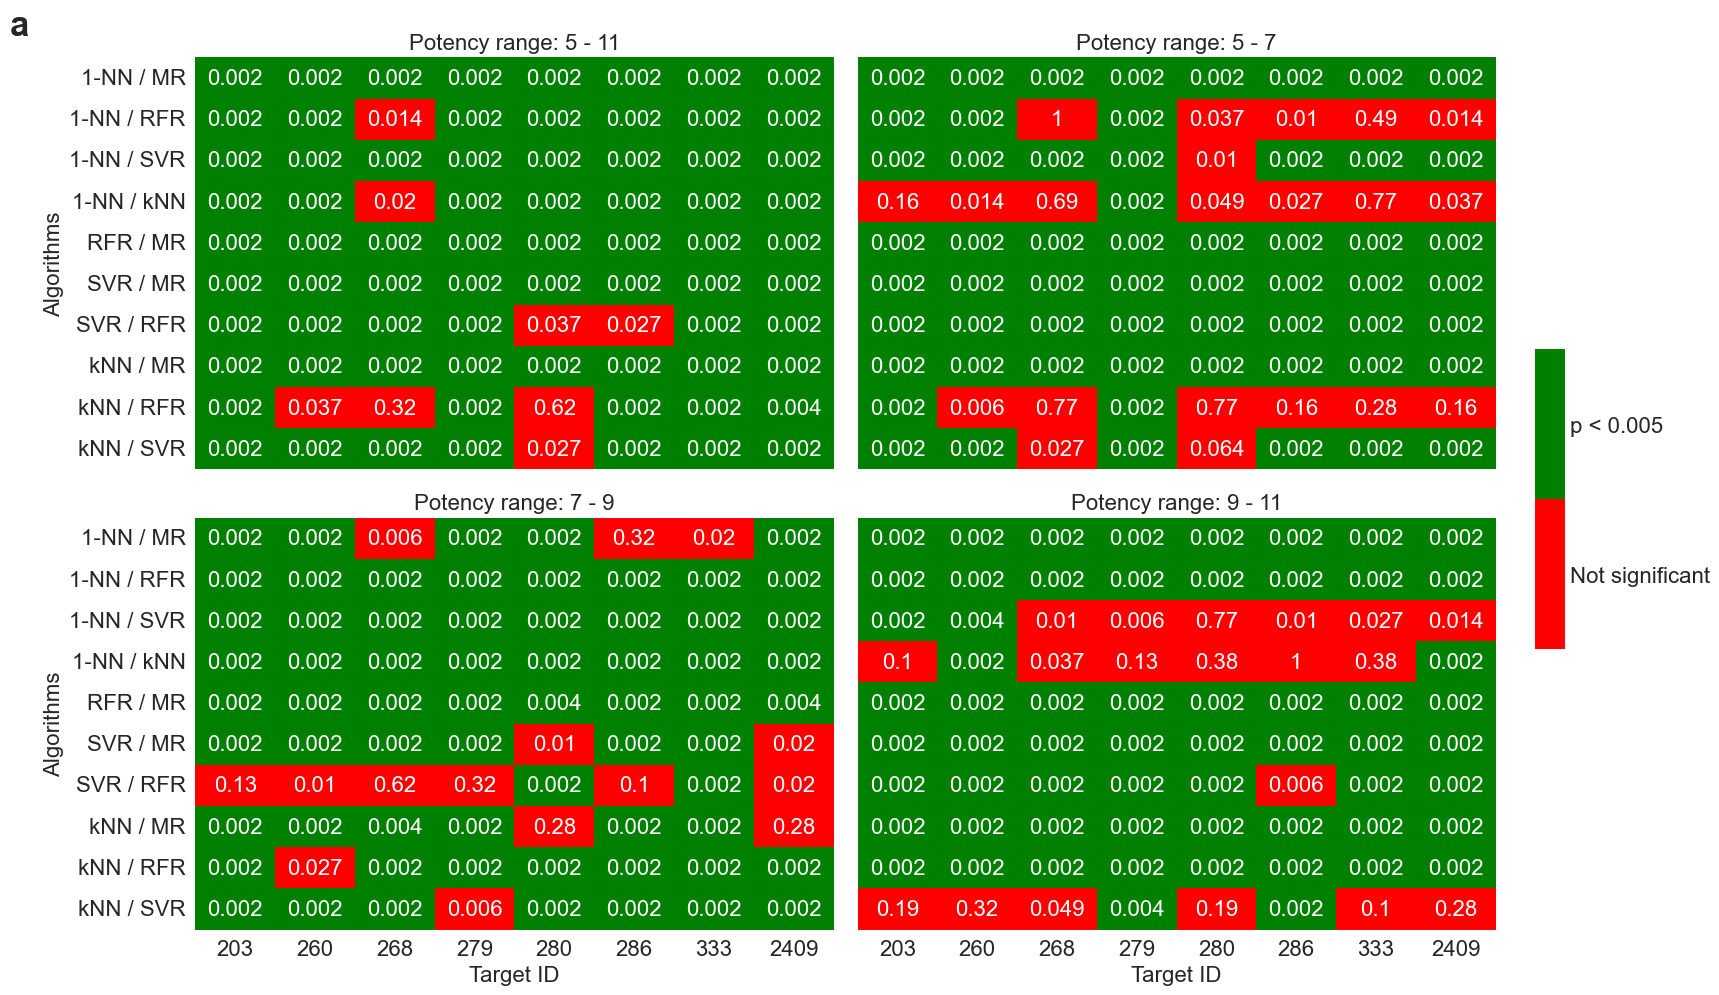

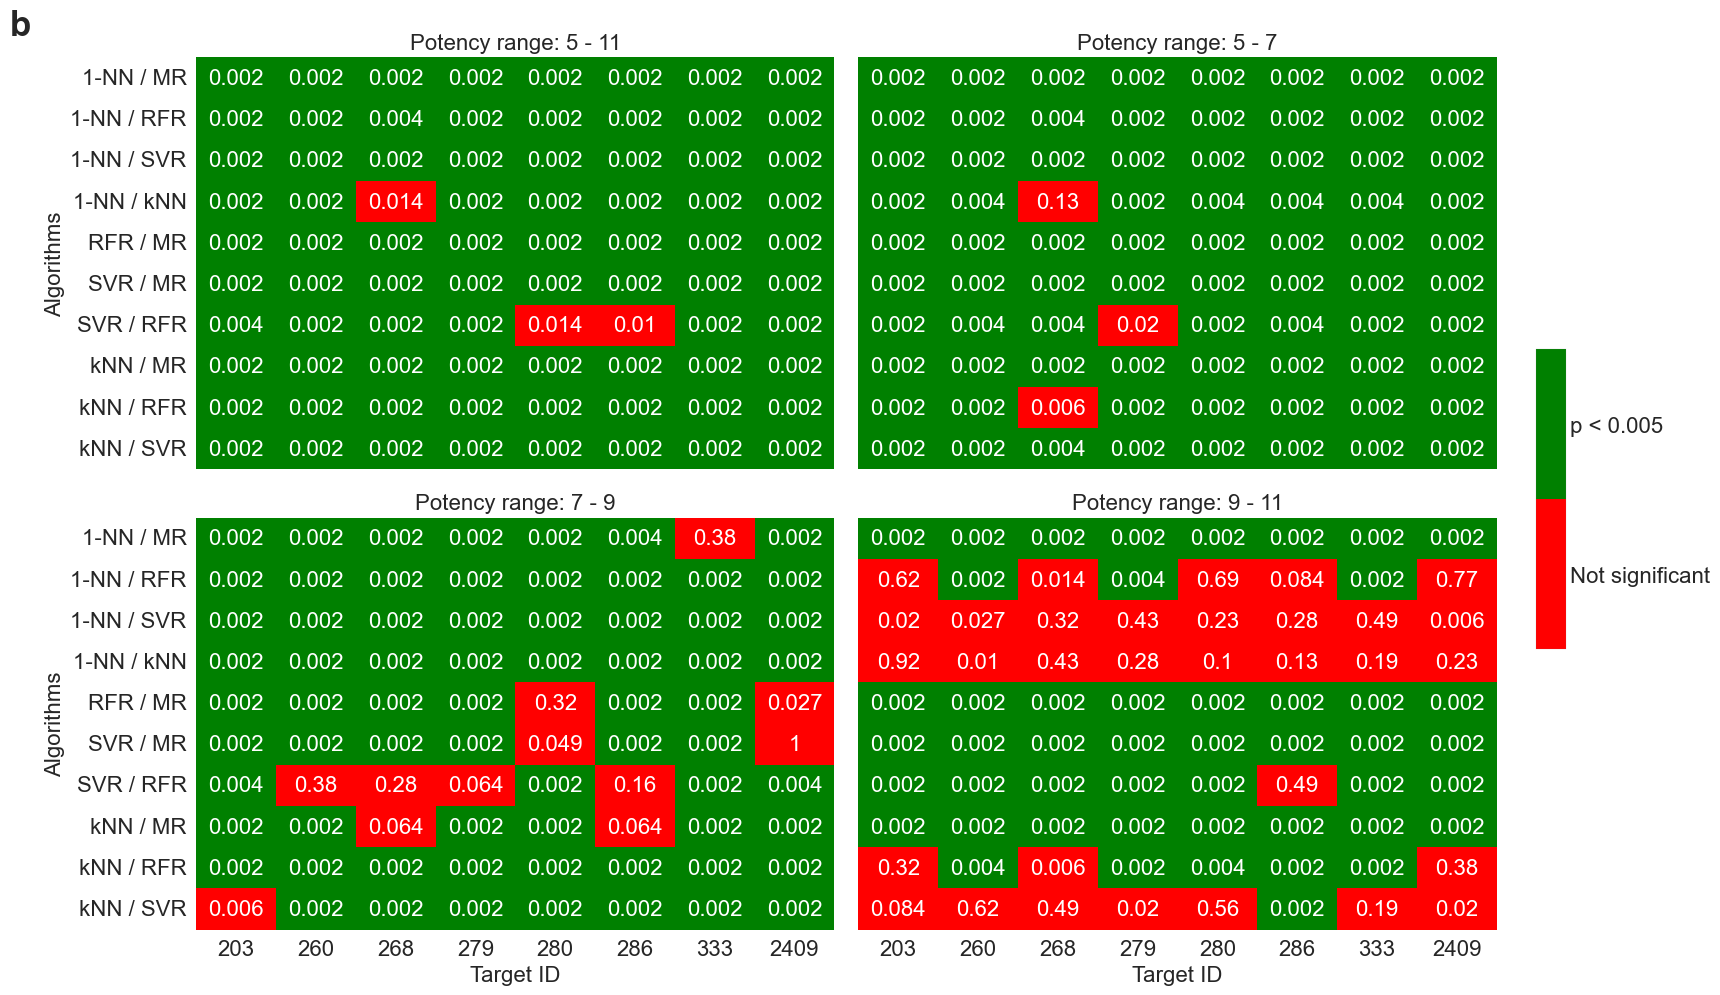

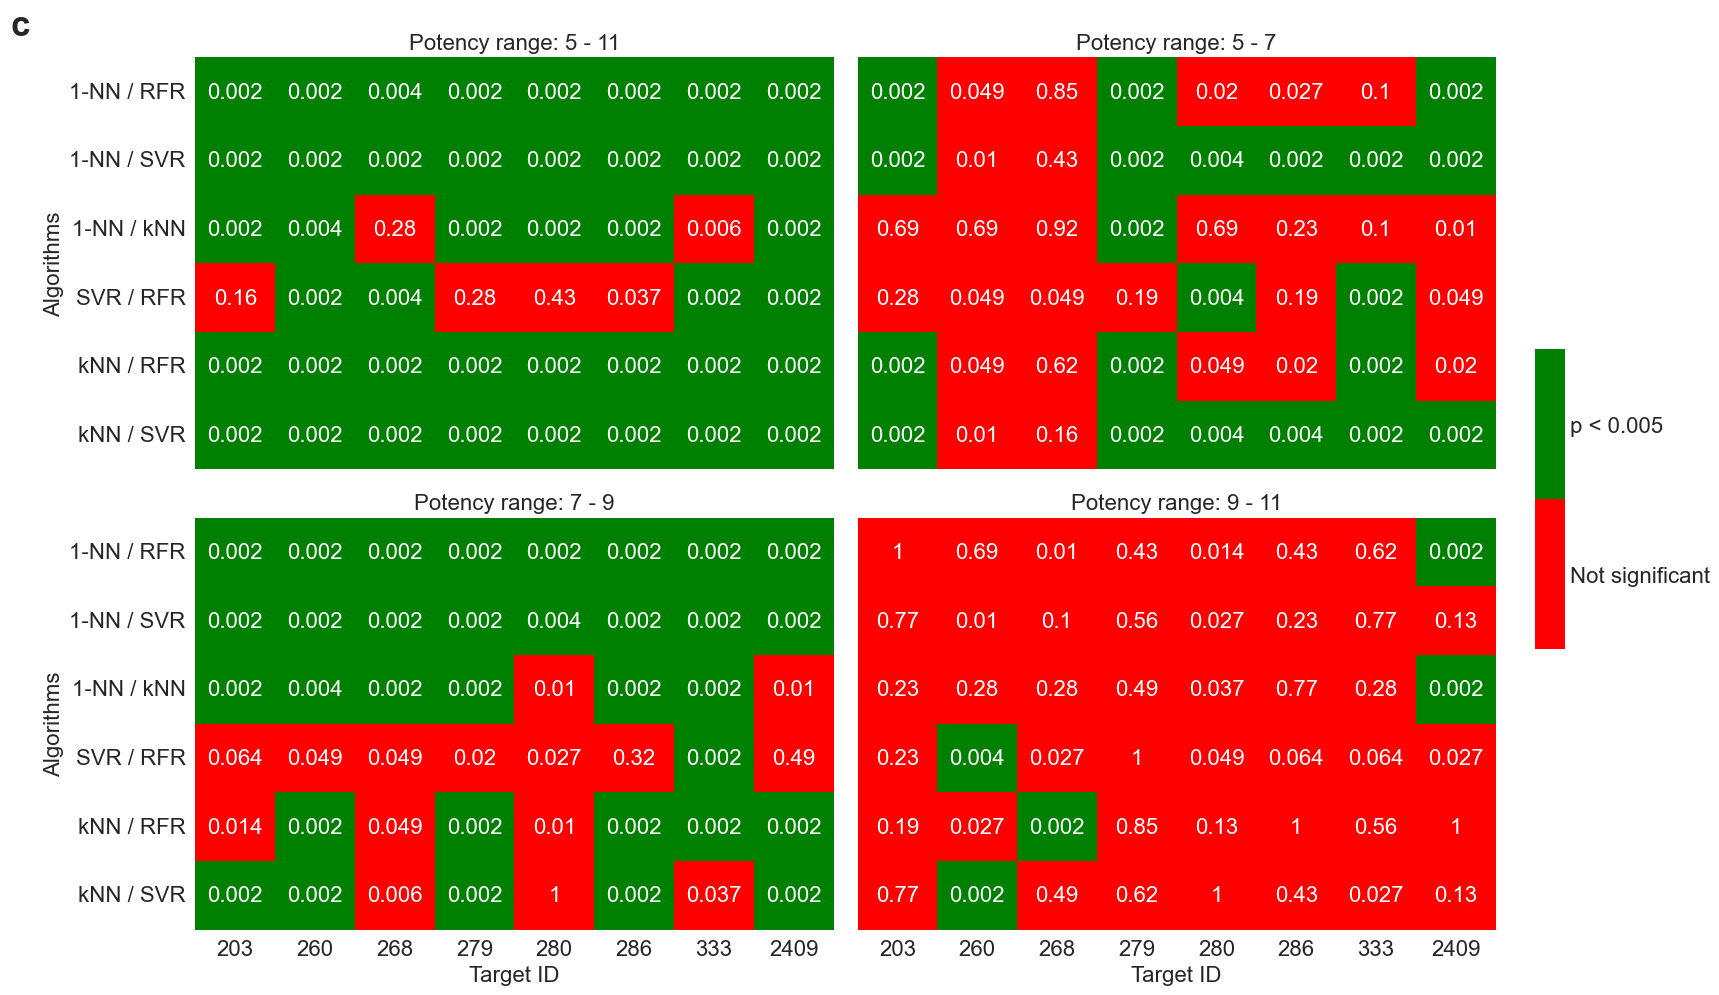

In [34]:
for t, met in zip(['a', 'b', 'c'], ['MAE', 'RMSE', 'r²']):
    plot_heatmap_stat_analysis(mut_result.loc[(mut_result.Metric == f'{met}')], x='Target ID', y='Algorithms', value='p_value', col='Potency range', col_wrap=2, height=5, aspect=1.5, square=False,
                               #results_path=figure_path, filename=f'S3_{t}', 
                               sub_fig_title=t
                               )